## STOCKHOLM TEAM

## Exploratory Data Analysis of the Indian StartUp Funding Ecosystem 

### Business Understanding

**Project Description:**

Explore the Indian startup funding ecosystem through an in-depth analysis of funding data from 2019 to 2021. Gain insights into key trends, funding patterns, and factors driving startup success. Investigate the relationship between funding and startup growth, with a focus on temporal patterns and city-level dynamics. Identify preferred sectors for investment and uncover industry-specific funding trends. This exploratory data analysis provides a comprehensive overview of the Indian startup ecosystem, offering valuable insights for entrepreneurs, investors, and policymakers.

## Data Understanding

This project aims to explore and gain a deeper understanding of the Indian startup funding ecosystem. The dataset used for analysis contains information about startup funding from 2019 to 2021. The dataset includes various attributes such as the company's name, sector, funding amount, funding round, investor details, and location.

To conduct a comprehensive analysis, we will examine the dataset to understand its structure, contents, and any potential data quality issues. By understanding the data, we can ensure the accuracy and reliability of our analysis.

The key attributes in the dataset include:

- **Company**: The name of the startup receiving funding.
- **Sector**: The industry or sector to which the startup belongs.
- **Amount**: The amount of funding received by the startup.
- **Stage**: The round of funding (e.g., seed, series A, series B).
- **Location**: The city or region where the startup is based.
- **About**: What the company does.
- **Funding Year**:When the company was funded

By examining these attributes, we can uncover insights about the funding landscape, identify trends in funding amounts and rounds, explore the preferred sectors for investment, and analyze the role of cities in the startup ecosystem.

Throughout the analysis, we will use visualizations and statistical techniques to present the findings effectively. By understanding the data and its characteristics, we can proceed with confidence in our analysis, derive meaningful insights, and make informed decisions based on the findings.

### Hypothesis:

#### NULL Hypothesis (HO) :

#### **The sector of a company does not have an impact on the amount of funding it receives.**


#### ALTERNATE Hypothesis (HA):

#### **The sector of a company does have an impact on the amount of funding it receives.**




##  Research / Analysis Questions:

1. What are the most common industries represented in the datasets?

2. How does the funding amount vary across different rounds/series in the datasets?
   
3. Which locations have the highest number of companies in the datasets?
   
4. What kind of investment type should startups look for depending on their industry type? (EDA: Analysis of funding preferences by industry)

5. Are there any correlations between the funding amount and the company's sector or location?
   
6. What are the top investors in the datasets based on the number of investments made?
   
7. Which industries are favored by investors based on the number of funding rounds? (EDA: Top 10 industries which are favored by investors)

8. Are there any outliers in the funding amounts in the datasets?
   
9.  Is there a relationship between the company's sector and the presence of certain investors?
    
10. What is the range of funds generally received by startups in India (Max, min, avg, and count of funding)? (EDA: Descriptive statistics of funding amounts)


## Data Preparation

Before diving into the analysis, we will preprocess and clean the data to ensure its quality and suitability for analysis. This may involve handling missing values, correcting data types, and addressing any inconsistencies or outliers that could affect the accuracy of our results.

Once the data is prepared, we will be ready to perform an in-depth exploratory analysis of the Indian startup funding ecosystem. The analysis will involve answering specific research questions, identifying patterns and trends, and generating meaningful visualizations to present the findings.

Through this process of data understanding and preparation, we will set a solid foundation for conducting a robust and insightful analysis of the Indian startup funding data.

**The data for each year is sourced from separate two csv files and two from a remote server. They will be merged later to one dataset**

### Load the Packages/Modules

In [262]:
%pip install forex-python
%pip install pandas
%pip install python-dotenv
%pip install seaborn
%pip install matplotlib
%pip install pyodbc
%pip install numpy


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BAKU\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BAKU\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BAKU\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BAKU\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BAKU\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BAKU\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BAKU\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [263]:
# Importing the Modules needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

from forex_python.converter import CurrencyRates
import re 

from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp

### Import Datasets

In [264]:
df = pd.read_csv('startup_funding2018.csv') # read the data_2018 and convert it to pandas data frame 

In [265]:
df2 = pd.read_csv('startup_funding2019.csv') # read the data_2019 and convert it to pandas data frame

#### Accessing the Remote Server Datasets

In [266]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
connection_string = "DRIVER={ODBC Driver 17 for SQL Server};SERVER={dap-projects-database.database.windows.net};DATABASE={dapDB};UID={dataAnalyst_LP1};PWD={G7x@9kR$2x}"

In [267]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [268]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 
query1 = "SELECT * FROM dbo.LP1_startup_funding2020"
query2 = "SELECT * FROM dbo.LP1_startup_funding2021"
df3 = pd.read_sql(query1, connection)
df4 = pd.read_sql(query2, connection)

## Display Options

In [269]:
#Set display options to show all values without truncation
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

## Import Datasets

#### 2018 Data

In [270]:
df.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and frolic of Colleges."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy farmers in rural Maharashtra.
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants to create a difference by selling globally.


In [271]:
df.shape # displaying the shape of the data as in column and row wise

(526, 6)

In [272]:
df.columns # here we want to look at the columns in data set

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [273]:
df.info()  # Getting information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [274]:
df.describe(include='object')  # here Generating descriptive statistics of the DataFrame

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and frolic of Colleges."
freq,2,30,280,148,102,2


now we have some description about the data set, we can now move on with data cleaning
 
MISSING VALUES 

#### Handling Duplicated Data

In [275]:
# below we are checking duplicates values withinn the columns 

columns_to_check = ['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location', 'About Company']

for column in columns_to_check:
    has_duplicates = df[column].duplicated().any()
    print(f'{column}: {has_duplicates}')

Company Name: True
Industry: True
Round/Series: True
Amount: True
Location: True
About Company: True


In [276]:
df.drop_duplicates(subset=['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location', 'About Company'], inplace=True)

Standardizing Data Formats

now let's see how we can standardize tha data set to make sure we have the same format of data points 

first let's check for dash symbols within the columns using a simple python function 

In [277]:
# below we are checking for '-' symbols within the columns

columns_to_check = ['Amount', 'Company Name', 'Location', 'About Company', 'Industry', 'Round/Series']

for column in columns_to_check:
    has_dash_symbols = df[column].str.contains('—').any()
    print(f"{column}: {has_dash_symbols}")

Amount: True
Company Name: False
Location: False
About Company: False
Industry: True
Round/Series: False


now let's handle the dash symbols in **the Amount column**, clean and format the amount the column correctly & Convert Currency to USD

In [278]:
df['Amount'].head() # first let's look at the Amount the column

0         250000
1    ₹40,000,000
2    ₹65,000,000
3        2000000
4              —
Name: Amount, dtype: object

In [279]:
# Cleaning the Amounts column 

df['Amount'] = df['Amount'].apply(str)
df['Amount'].replace(",", "", inplace = True, regex=True)
df['Amount'].replace("—", 0, inplace = True, regex=True)
df['Amount'].replace("$", "", inplace = True, regex=True)

## Assumptions Made for Amount Column
- Amounts without currency symbols in the 2018 dataset are in USD.
- The average Indian Rupee (INR) to US Dollar (USD) rate for the relevant year will be used for currency conversions.
- Use exchange rate from https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html, use the average exchange rate of 0.0146

In [280]:
# Set the desired exchange rate
exchange_rate = 0.0146

# Cleaning the Amounts column
df['Amount'] = df['Amount'].apply(str)
df['Amount'].replace([',', '—', '$'], ['', 0, ''], inplace=True, regex=True)

# Extract the Indian currency amount
df['Indiancurr'] = df['Amount'].str.rsplit('₹', n=2).str[1]
df['Indiancurr'] = df['Indiancurr'].apply(float).fillna(0)

# Convert Indian currency to USD using the specified exchange rate
df['UsCurr'] = df['Indiancurr'] * exchange_rate

# Replace 0 values with NaN
df['UsCurr'] = df['UsCurr'].replace(0, np.nan)

# Fill NaN values in 'UsCurr' with original 'Amount' values
df['UsCurr'] = df['UsCurr'].fillna(df['Amount'])

# Remove '$' symbol from 'UsCurr' column
df['UsCurr'] = df['UsCurr'].replace("$", "", regex=True)

# Update 'Amount' column with converted USD values
df['Amount'] = df['UsCurr'].apply(lambda x: float(str(x).replace("$","")))

# Replace 0 values with NaN in 'Amount' column
df['Amount'] = df['Amount'].replace(0, np.nan)

# Format the 'Amount' column
format_amount = lambda amount: "{:,.2f}".format(amount)
df['Amount'] = df['Amount'].map(format_amount)

In [281]:
df['Amount'] = df['Amount'].str.replace(',', '').astype(float) # since the Amount column is holding and amount, we have to comvert it to float
type(df['Amount'][0])

numpy.float64

#### Handling Categorical Data
NOW LET'S 

handle the categorical data in the 'Industry', 'Round/Series', and 'Location' columns

Analyzing unique values
Start by examining the unique values in each column to identify any inconsistencies or variations we do this 
Using the unique() function to get the unique values in each column.

### Location Column

#### The Location column contains combined information (e.g., city, state, country)

In [282]:
df['Location'].unique() # checking each unique values 

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [283]:
df['Location'].value_counts() # getting the total of all unique values 

Bangalore, Karnataka, India         101
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India           1


In [284]:
# The 'Location' column is in the format, 'City, Region, Country',
# Only 'City' aspect is needed for this analysis
# Take all character until we reach the first comma sign

df['Location'] = df['Location'].apply(str)
df['Location'] = df['Location'].str.split(',').str[0]
df['Location'] = df['Location'].replace("'","",regex=True)

In [285]:
# From observation, some city names that refer to the same place are appearing different.
# The incorrect names need to be rectified for correct analysis, eg A city with more than one name.
df["Location"] = df["Location"].replace (['Bangalore','Bangalore City'], 'Bengaluru')
df.loc[~df['Location'].str.contains('New Delhi', na=False), 'Location'] = df['Location'].str.replace('Delhi', 'New Delhi')
df['Location'] = df['Location'].replace (['Gurgaon'], 'Gurugram')

In [286]:
df['Location'] # taking a look at the location column to comfirm the changes 

0          Bengaluru
1             Mumbai
2           Gurugram
3              Noida
4          Hyderabad
5          Bengaluru
6            Kalkaji
7          Hyderabad
8             Mumbai
9          Bengaluru
10         New Delhi
11         Bengaluru
12             India
13             Hubli
14         Bengaluru
15         Bengaluru
16            Mumbai
17         Bengaluru
18         New Delhi
19           Chennai
20            Mumbai
21            Mumbai
22         New Delhi
23         New Delhi
24         Bengaluru
25            Mohali
26           Chennai
27            Mumbai
28            Mumbai
29         Hyderabad
30         New Delhi
31           Kolkata
32         Bengaluru
33         Bengaluru
34            Mumbai
35         Bengaluru
36            Mumbai
37         New Delhi
38            Mumbai
39           Chennai
40         New Delhi
41         Hyderabad
42             India
43            Mumbai
44         New Delhi
45         New Delhi
46         Bengaluru
47           

In [287]:
df['Location'].unique() # checking the unique values once more

array(['Bengaluru', 'Mumbai', 'Gurugram', 'Noida', 'Hyderabad', 'Kalkaji',
       'New Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata',
       'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana',
       'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum',
       'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum',
       'Ernakulam', 'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore',
       'Ghaziabad', 'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal',
       'Coimbatore', 'Worli', 'Alleppey', 'Chandigarh', 'Guindy',
       'Lucknow'], dtype=object)

In [288]:
df['Location'].value_counts() # counting the unique values again to be sure of the changes 

Bengaluru        161
Mumbai            94
New Delhi         67
Gurugram          52
Pune              20
Chennai           19
Hyderabad         18
Noida             15
Haryana           11
Jaipur             9
Kolkata            6
Ahmedabad          6
Indore             4
India              4
Kormangala         3
Bhopal             2
Ghaziabad          2
Thane              2
Kochi              2
Alleppey           1
Guindy             1
Andheri            1
Mylapore           1
Powai              1
Worli              1
Guntur             1
Kalpakkam          1
Chandigarh         1
Coimbatore         1
Uttar Pradesh      1
Belgaum            1
Ernakulam          1
Trivandrum         1
Kannur             1
Alwar              1
Margão             1
Anand              1
Kota               1
Faridabad          1
Cochin             1
Azadpur            1
Kanpur             1
Jodhpur            1
Mohali             1
Hubli              1
Kalkaji            1
Lucknow            1
Name: Locatio

In [289]:
df['Location'].isnull().sum() # checking for null values in the loaction column

0

### Industry Column

In [290]:
df['Industry'] # taking a look at the Industry column first to have some insight into the column 

0                                                                           Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing
1                                                                                                                          Agriculture, Farming
2                                                                                              Credit, Financial Services, Lending, Marketplace
3                                                                                                                   Financial Services, FinTech
4                                                                                                            E-Commerce Platforms, Retail, SaaS
5                                                                                                              Cloud Infrastructure, PaaS, SaaS
6                                                                                                                Internet, Leisure, Mark

In [291]:
# let's check all the unique values in the industry column
df['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [292]:
df['Industry'].value_counts() # counting all the unique values in the Industry column 

—                                                                                                                                           30
Financial Services                                                                                                                          15
Education                                                                                                                                    8
Information Technology                                                                                                                       7
Finance, Financial Services                                                                                                                  5
Health Care, Hospital                                                                                                                        5
Artificial Intelligence                                                                                                                      4

BELOW WE WANT TO HANDLE, Title casing, leading and trailing spaces and also standardize the indusrty column 

In [293]:
# Get unique values in the 'Industry' column
unique_values = df['Industry'].unique()
# Create a set to store the delimiters
delimiters = set()

# Iterate over the unique values
for value in unique_values:
    parts = re.split(',|;|/|-', value) # Split the value by commas and other delimiters
    delimiters.update(filter(lambda x: x != '', parts[1:])) # Add the delimiters to the set
# Print the identified delimiters
print(delimiters)

{' Communities', ' Fantasy Sports', ' Apps', ' Business Development', ' Organic Food', ' Nutrition', ' Video Chat', ' Speech Recognition', ' Impact Investing', ' Parenting', ' Electric Vehicle', ' Operating Systems', ' Office Administration', ' Reading Apps', ' Freight Service', ' Analytics', ' Crowdfunding', ' Social Media', ' Health Diagnostics', ' Gaming', ' Sporting Goods', ' Furniture', ' Shipping', ' Tourism', ' Information Technology', ' Personal Finance', ' Wealth Management', ' Retail Technology', ' Computer Vision', ' Property Management', ' Taxi Service', ' Pharmaceutical', ' Medical', ' Information Services', ' Sports', ' Retail', ' Tutoring', ' Cyber Security', ' Robotics', ' Network Security', ' Health Insurance', ' Renewable Energy', ' Enterprise Software', ' Drones', ' Knowledge Management', ' Wireless', ' Infrastructure', ' Business Intelligence', ' E', 'cleaning', ' Personal Health', ' Financial Services', ' Consumer Lending', ' Video on Demand', ' Home Renovation', '

In [294]:
# keeping only the first unique vlaues in the Industry column
df['Industry'] = df['Industry'].str.split(',').str[0]
#converting the industry names in the column to title case
df['Industry'] = df['Industry'].str.title()

In [295]:
df[df['Industry']=='—']

,Company Name,Industry,Round/Series,Amount,Location,About Company,Indiancurr,UsCurr
58,MissMalini Entertainment,—,Seed,1518400.00,Mumbai,"MissMalini Entertainment is a multi-platform new media network dedicated to Entertaining, Connecting & Empowering young Indians.",104000000.00,1518400.00
105,Jagaran Microfin,—,Debt Financing,8030000.00,Kolkata,Jagaran Microfin is a Microfinance institution which achieves a healthy amalgamation of social and financial,550000000.00,8030000.00
121,FLEECA,—,Seed,NaN,Jaipur,FLEECA is a Tyre Care Provider company.,0.00,0
146,WheelsEMI,—,Series B,14000000.00,Pune,"WheelsEMI is the brand name of NBFC, WheelsEMI Pvt. Ltd.",0.00,$14000000
153,Fric Bergen,—,Venture - Series Unknown,NaN,Alwar,Fric Bergen is a leader in the specialty food industry.,0.00,0
174,Deftouch,—,Seed,NaN,Bengaluru,Deftouch is a mobile game development company that currently focuses on winning the Cricket gaming market with a social multiplayer game.,0.00,0
181,Corefactors,—,Seed,NaN,Bengaluru,"Corefactors is a leading campaign management, business communication and analytics company.",0.00,0
210,Cell Propulsion,—,Seed,102200.00,Bengaluru,Cell Propulsion is an electric mobility startup that designs autonomous electric vehicles.,7000000.00,102200.00
230,Flathalt,—,Angel,50000.00,Gurugram,FInd your Customized Home here.,0.00,50000
235,dishq,—,Seed,400000.00,Bengaluru,dishq leverages food science and machine learning (AI) to understand and predict people's tastes.,0.00,400000


In [296]:
# renaming some of the Company names to their official names

company_mapping = {
    'dishq': 'DISH',
    'HousingMan.com': 'HousingMan',
    'ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED': 'ENLYFT DIGITAL SOLUTIONS',
    'Toffee': 'Toffee Pvt Ltd',
    'Avenues Payments India Pvt. Ltd.': 'Avenues Payments',
    'Planet11 eCommerce Solutions India (Avenue11)': 'Planet11',
    
}

# Replacing the '-' dash symbols in the Sector column 

industry_mapping = {
    '—': '',
    'Fashion and Lifestyle Blog': 'Fashion and Lifestyle Blog',
    'Financial Services': 'Financial Services',
    'Automotive Services': 'Automotive Services',
    'Automotive Financing': 'Automotive Financing',
    'Food and Beverage': 'Food and Beverage',
    'Gaming and Entertainment': 'Gaming and Entertainment',
    'Marketing Technology': 'Marketing Technology',
    'Electric Vehicle Technology': 'Electric Vehicle Technology',
    'Real Estate Technology': 'Real Estate Technology',
    'Telecommunications': 'Telecommunications',
    'E-commerce': 'E-commerce',
    'Hospitality Technology': 'Hospitality Technology',
    'Health and Wellness': 'Health and Wellness',
    'Digital Marketing': 'Digital Marketing',
    'E-commerce Solutions': 'E-commerce Solutions',
    'Transportation and Logistics Technology': 'Transportation and Logistics Technology',
    'Cosmetics': 'Cosmetics',
    'Travel and Adventure': 'Travel and Adventure',
    'EdTech': 'EdTech'
}

# Replace the dash symbol with the corresponding values using apply function
df['Company Name'] = df['Company Name'].apply(lambda x: company_mapping[x] if x in company_mapping else x)
df['Industry'] = df['Industry'].apply(lambda x: industry_mapping[x] if x in industry_mapping else x)

In [297]:
# checking if there are any leading or trailing spaces in the industry names in the 'Industry' column
has_spaces = df['Industry'].str.contains('^s|s$', regex=True)

rows_with_spaces = df[has_spaces]
print(rows_with_spaces)

                                       Company Name  \
3                                       PayMe India   
4                                          Eunimart   
8                                      Freightwalla   
9                                Microchip Payments   
12                                            Flock   
19                 Antariksh Waste Ventures Pvt ltd   
21                                       PaisaDukan   
23                                         BlueJack   
26                                            Pando   
27                                          Mintifi   
30                                     Chariot Tech   
32                                          Loanzen   
39                                       Kaleidofin   
44                                        Letstrack   
46                                            Finzy   
47                                       Fitternity   
59                                           Rooter   
65        

In [298]:
# remove the leading or trailing spaces from the industry names in the 'Industry' column
df['Industry'] = df['Industry'].str.strip()

In [299]:
df['Industry'].isnull().sum() # confirming the null values in the industry column 

0

In [300]:
df.head() # getting the first sample of the data set 

,Company Name,Industry,Round/Series,Amount,Location,About Company,Indiancurr,UsCurr
0,TheCollegeFever,Brand Marketing,Seed,250000.00,Bengaluru,"TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.",0.00,250000
1,Happy Cow Dairy,Agriculture,Seed,584000.00,Mumbai,A startup which aggregates milk from dairy farmers in rural Maharashtra.,40000000.00,584000.00
2,MyLoanCare,Credit,Series A,949000.00,Gurugram,Leading Online Loans Marketplace in India,65000000.00,949000.00
3,PayMe India,Financial Services,Angel,2000000.00,Noida,PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.,0.00,2000000
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants to create a difference by selling globally.,0.00,0


### Round/Series Column

In [301]:
df['Round/Series'].unique() # getting the unique values 

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [302]:
df['Round/Series'].value_counts() # counting and returning the sum of all the values 

Seed                                                                                                       279
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                              8
P

In [303]:
# below we are replacing some unique values such as undisclosed with nan and remove some inconsistency from the data

df['Round/Series']=df['Round/Series'].replace('Undisclosed',np.nan)
df['Round/Series']=df['Round/Series'].replace('Venture - Series Unknown',np.nan)
df['Round/Series'] = df['Round/Series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 'nan')
df['Round/Series'] = df['Round/Series'].replace('nan', np.nan)

In [304]:
df['Round/Series'].unique() # getting the unique values 

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', nan, 'Grant', 'Debt Financing', 'Post-IPO Debt',
       'Series H', 'Series C', 'Series E', 'Corporate Round', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

In [305]:
df['Round/Series'].value_counts() # counting and returning the sum of all the values  

Seed                     279
Series A                  73
Angel                     37
Series B                  20
Series C                  16
Debt Financing            13
Private Equity            10
Corporate Round            8
Pre-Seed                   6
Series E                   5
Grant                      4
Series D                   3
Secondary Market           3
Post-IPO Equity            3
Post-IPO Debt              2
Non-equity Assistance      1
Series H                   1
Funding Round              1
Name: Round/Series, dtype: int64

### Clean Categorical Data 

In [306]:
# Clean Company Name column
df['Company Name'] = df['Company Name'].str.strip()  # Remove leading and trailing spaces
df['Company Name'] = df['Company Name'].str.title()  # Standardize capitalization

# Clean About Company column
df['About Company'] = df['About Company'].str.strip()  # Remove leading and trailing spaces

# Function to handle special characters or encoding issues
def clean_text(text):
    # Remove special characters using regex
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return cleaned_text

# Apply the clean_text function to the About Company column
df['About Company'] = df['About Company'].apply(clean_text)

# Print the cleaned DataFrame
df.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Indiancurr,UsCurr
0,Thecollegefever,Brand Marketing,Seed,250000.00,Bengaluru,TheCollegeFever is a hub for fun fiesta and frolic of Colleges,0.00,250000
1,Happy Cow Dairy,Agriculture,Seed,584000.00,Mumbai,A startup which aggregates milk from dairy farmers in rural Maharashtra,40000000.00,584000.00
2,Myloancare,Credit,Series A,949000.00,Gurugram,Leading Online Loans Marketplace in India,65000000.00,949000.00
3,Payme India,Financial Services,Angel,2000000.00,Noida,PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees,0.00,2000000
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants to create a difference by selling globally,0.00,0


BELOW WE ARE CHECKING FOR NULL VALUES IN THE ROUND/SERIESE COLUMN 

In [307]:
df['Round/Series'].isnull().sum() # checking for null values

40

NOW LET'S RE-ORDER THE ROUND/SERIES COLUMN 

In [308]:
grouped_stages = {
    # Group 1: Early Stage
    'Pre-seed': 'Early Stage',
    'Seed': 'Early Stage',
    'Seed A': 'Early Stage',
    'Seed Funding': 'Early Stage',
    'Seed Investment': 'Early Stage',
    'Seed Round': 'Early Stage',
    'Seed Round & Series A': 'Early Stage',
    'Seed fund': 'Early Stage',
    'Seed funding': 'Early Stage',
    'Seed round': 'Early Stage',
    'Seed+': 'Early Stage',

    # Group 2: Mid Stage
    'Series A': 'Mid Stage',
    'Series A+': 'Mid Stage',
    'Series A-1': 'Mid Stage',
    'Series A2': 'Mid Stage',
    'Series B': 'Mid Stage',
    'Series B+': 'Mid Stage',
    'Series B2': 'Mid Stage',
    'Series B3': 'Mid Stage',
    'Series C': 'Mid Stage',
    'Seies A': 'Mid Stage',
    
    # Group 3: Late Stage
    'Series D': 'Late Stage',
    'Series I': 'Late Stage',
    'Series D1': 'Late Stage',
    'Series E': 'Late Stage',
    'Series E2': 'Late Stage',
    'Series F': 'Late Stage',
    'Series F1': 'Late Stage',
    'Series F2': 'Late Stage',
    'Series G': 'Late Stage',
    'Series H': 'Late Stage',
    
    # Group 4: Other Stages
    'Angel': 'Other Stages',
    'Angel Round': 'Other Stages',
    'Bridge': 'Other Stages',
    'Bridge Round': 'Other Stages',
    'Corporate Round': 'Other Stages',
    'Debt': 'Other Stages',
    'Debt Financing': 'Other Stages',
    'Early seed': 'Other Stages',
    'Edge': 'Other Stages',
    'Fresh funding': 'Other Stages',
    'Funding Round': 'Other Stages',
    'Grant': 'Other Stages',
    'Mid series': 'Other Stages',
    'Non-equity Assistance': 'Other Stages',
    'None': 'Other Stages',
    'PE': 'Other Stages',
    'Post series A': 'Other Stages',
    'Post-IPO Debt': 'Other Stages',
    'Post-IPO Equity': 'Other Stages',
    'Pre Series A': 'Other Stages',
    'Pre- series A': 'Other Stages',
    'Pre-Seed': 'Other Stages',
    'Pre-Series B': 'Other Stages',
    'Private Equity': 'Other Stages',
    'Secondary Market': 'Other Stages',
    'Pre-series A': 'Other Stages',
    'None': 'Other Series',
    'Pre-series B':'Other Stages',
    'Pre-series A1': 'Other Stage',
    'Pre-series':'Other Stages',
}

df['Round/Series'] = df['Round/Series'].replace(grouped_stages)


In [309]:
df['Round/Series'] # confirming the Round/Series again 

0       Early Stage
1       Early Stage
2         Mid Stage
3      Other Stages
4       Early Stage
5       Early Stage
6       Early Stage
7      Other Stages
8       Early Stage
9       Early Stage
10      Early Stage
11      Early Stage
12      Early Stage
13      Early Stage
14      Early Stage
15      Early Stage
16      Early Stage
17      Early Stage
18      Early Stage
19      Early Stage
20        Mid Stage
21      Early Stage
22      Early Stage
23      Early Stage
24      Early Stage
25        Mid Stage
26      Early Stage
27      Early Stage
28      Early Stage
29     Other Stages
30      Early Stage
31      Early Stage
32      Early Stage
33      Early Stage
34      Early Stage
35        Mid Stage
36        Mid Stage
37      Early Stage
38        Mid Stage
39      Early Stage
40      Early Stage
41      Early Stage
42      Early Stage
43      Early Stage
44      Early Stage
45      Early Stage
46      Early Stage
47      Early Stage
48      Early Stage
49      Early Stage


NOW LET'S DEAL WITH THE NULL VALUES IN THE ROUND/SERIES 

NOW LET'S CREATE THE CROSSTAB

In [310]:
cross_table_Round_Series_Indu = pd.crosstab(df['Industry'], ['Round/Series']) # here we are creating a contingency table between stage and sector 
cross_table_Round_Series_Indu

col_0,Round/Series
Industry,
,30
3D Printing,1
Accounting,3
Advertising,4
Aerospace,2
Agriculture,8
Agtech,1
Air Transportation,1
Alternative Medicine,1


now to deal with the missing value in the stage column, we will use the percentage of the first 6 largest most occurring 
Round/Series column to fill in the missing values

In [311]:
# below we are getting the percentages 
cross_table_Round_Series_Indu_perc = (cross_table_Round_Series_Indu['Round/Series'] / cross_table_Round_Series_Indu['Round/Series'].sum()) * 100
cross_table_Round_Series_Indu_perc


Industry
                                     5.71
3D Printing                          0.19
Accounting                           0.57
Advertising                          0.76
Aerospace                            0.38
Agriculture                          1.52
Agtech                               0.19
Air Transportation                   0.19
Alternative Medicine                 0.19
Analytics                            0.76
Android                              0.19
Apps                                 3.81
Artificial Intelligence              2.86
Audio                                0.19
Automotive                           3.43
Autonomous Vehicles                  0.38
B2B                                  1.90
Banking                              1.33
Basketball                           0.19
Battery                              0.19
Beauty                               0.76
Big Data                             0.95
Biopharma                            0.19
Biotechnology            

NOW LET'S LOOK AT THE FIRST SIX 

In [312]:
top_six_Round_Series = cross_table_Round_Series_Indu_perc.nlargest(6) # here we are looking at the top six Round/Series 
top_six_Round_Series

Industry
                     5.71
Financial Services   4.95
Health Care          4.95
E-Commerce           4.19
Apps                 3.81
Automotive           3.43
Name: Round/Series, dtype: float64

NOW LET'S FILL IN THE MISSING VALUES IN THE STAGE COLUMN, USING THE RESPECTIVE VALUES FROM THE TOP SIX 
STAGES 

In [313]:
# Filling missing values in "Round/Series" column with the top six values

# Normalize the probabilities
normalize_prob = top_six_Round_Series / top_six_Round_Series.sum()
# Filling missing values in "Round/Series" column with the top six values
df['Round/Series'] = df['Round/Series'].fillna(pd.Series(np.random.choice(top_six_Round_Series.index.tolist(), size=len(df['Round/Series']), p=normalize_prob.values)))


NOW LET'S CONFRIM THE MISSING VALUES IN THE ROUND/SERIES AGAIN 

In [314]:
# confirming the null values in the Round/Series column again 
df['Round/Series'].isnull().sum()

0

In [315]:
df.columns # looking at the columns in the data set to comfirm 

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company', 'Indiancurr', 'UsCurr'],
      dtype='object')

In [316]:
df.drop(columns=['Indiancurr','UsCurr'], inplace=True) # dropping some colunmns we need no more 

In [317]:
df.insert(6,"Funding Year", 2018) # inserting a new column 'startup_funding 2018' to keep track of this data set

In [318]:
# below are renaming the columns to ensure consistency when combinning the four data sets 

df.rename(columns = {'Company Name':'Company',
                        'Industry':'Sector',
                        'Amount':'Amount',
                        'About Company':'About',
                        'Round/Series' : 'Stage'},
             inplace = True)

In [319]:
df.head() # finally comfirming the head of the data to be sure of all changes before saving the data

,Company,Sector,Stage,Amount,Location,About,Funding Year
0,Thecollegefever,Brand Marketing,Early Stage,250000.00,Bengaluru,TheCollegeFever is a hub for fun fiesta and frolic of Colleges,2018
1,Happy Cow Dairy,Agriculture,Early Stage,584000.00,Mumbai,A startup which aggregates milk from dairy farmers in rural Maharashtra,2018
2,Myloancare,Credit,Mid Stage,949000.00,Gurugram,Leading Online Loans Marketplace in India,2018
3,Payme India,Financial Services,Other Stages,2000000.00,Noida,PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees,2018
4,Eunimart,E-Commerce Platforms,Early Stage,NaN,Hyderabad,Eunimart is a one stop solution for merchants to create a difference by selling globally,2018


NOW LET'S DO FINAL CLEANING TO BE SURE # 2018 DATA SETS 
WE WILL START BY CHECKING FOR NULL VALUES 

In [320]:
# here we want to check for null values in the entire data set
df.isnull().sum()


Company           0
Sector            0
Stage             0
Amount          148
Location          0
About             0
Funding Year      0
dtype: int64

NOW LET'S DEAL WITH THE AMOUNT COLUMN


In [321]:
# first let's check for the percentage of missing values in the Amount column
Amount_missing = df['Amount'].isna().sum()
Amount_total = df['Amount'].count()
percent_Amount_missing = (Amount_missing / Amount_total) * 100
percent_Amount_missing

39.257294429708224

TO TAKE OF THE NULL OR MISSING VALUES. WE WILL FIRST NEED TO UNDERSTAND THE PATTERN OF THE MISSING DATA 


first let's identify if there is any relationship between the missing values and the diffferent sectors 
this insight into the missing value will guide us on how to properly impute for the missing values 

We will start by creating a contingency table to show the distribution of missing values across the different
Sectors 

NOTE: this table and test is to help us prove or reject a hypothesis, by conducting a chi-square test 
Using the chi2_contingency function from the scipy.stats module to perform the chi-square test, this function calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies

but we will only look at the p-value with a specific chosen significant value 

Finally, we will interprete the result of the p-value, if the p-value is below a chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that there is a significant association between the missing values in the "Amount" column and the "Sector" column.

BELOW IS THE HYPOTHESIS AND THE ALTERNATIVE HYPOTHESIS

Null hypothesis (H0): There is no association between the missing values in the "Amount" column and the "Sector" column.

Alternative hypothesis (H1): There is a significant association between the missing values in the "Amount" column and the "Sector" column


Creating a contingency table:

 we will use the pd.crosstab() function to create a contingency table that will shows the distribution of missing values across the different sectors. This table will help us visualize the association between the two variables.

In [322]:
# creating the contingency table

conting_table = pd.crosstab(df['Sector'], df['Amount'].isnull())
conting_table

Amount,False,True
Sector,,
,20,10
3D Printing,0,1
Accounting,2,1
Advertising,2,2
Aerospace,1,1
Agriculture,3,5
Agtech,1,0
Air Transportation,1,0
Alternative Medicine,0,1


 now let's Perform the chi-square test: 

 Using the chi2_contingency() function from the scipy.stats module we will perform the chi-square test. This function calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies.

In [323]:
# below we are performing the chi-square test
chi2, p_value, _,_ = chi2_contingency(conting_table)
p_value

0.34916791124706825

Interpreting the results:

Checking the p-value obtained from the chi-square test.

If the p-value is below our chosen significance level (in this case 0.05), we can reject the null hypothesis and conclude that there is a significant association between the missing values in the "Amount" column and the "Sector" column. If the p-value is above the significance level, we fail to reject the null hypothesis.

In [324]:
# we are interpretting the chi-sqaure test 
significance_level = 0.05

if p_value < significance_level:
    print("There is a significant association between the missing values in the 'Amount' column and the 'Sector' column.")
else:
    print("There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.")


There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.


From the above output we can drop this approach to fill in the missing values 

THE NEXT APPROACH IS TO USE THE: 


Missing Data Patterns: 

We will analyze the patterns of missing values in the 'Amount' column and other relevant columns, in our case the 'Amount', 'Sector', 'Stage', 'Location' If the missing values are missing completely at random (MCAR) or missing at random (MAR), it may indicate that imputation methods like median imputation could be suitable.


BELOW WE WILL USE HEAT MAP AND CORRELATION PLOT TO TRY AND DETERMINE SOME PATTERNS 

1. MISSING DATA HEAT MAP

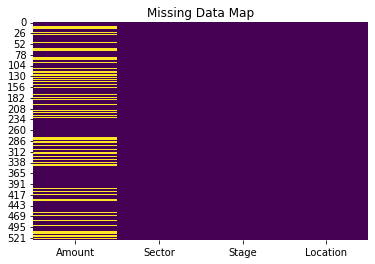

In [325]:
# creating a subset of the relevant columns
rele_col = ['Amount', 'Sector', 'Stage', 'Location']

# creating a dataframe with missing value indicator 
missing_indicator_df = df[rele_col].isnull()

# below we are creating a missing data heat map
sns.heatmap(missing_indicator_df, cmap='viridis', cbar=False)
plt.title('Missing Data Map')
plt.show()

The information from the above supports the assumption that the missing values in the 'Amount' column are missing completely at random (MCAR) or missing at random (MAR). This means that the missingness is unrelated to the 'Sector', 'Location', or 'Stage' variables.

Based on this pattern of missingness, median imputation could be a reasonable option to impute the missing values in the 'Amount' column.

2. CORRELATION PLOT

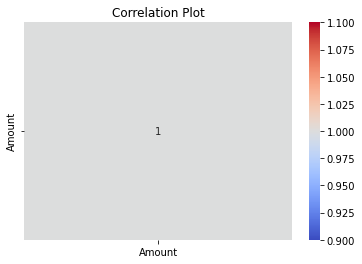

In [326]:
# below we are creating a correlation matrix plot

correl_matrix = df[rele_col].corr()
sns.heatmap(correl_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

NOW LET'S IMPUTE THE MISSING VALUES USING THE MEDIAN IMPUTATION 

In [327]:
# we are creating the median of the not missing values 
median_non_null_Amount = df['Amount'].dropna()

median_Amount = median_non_null_Amount.median() 

# below we are filling in the missing values with the median 
df['Amount'].fillna(median_Amount, inplace=True)

NOW LET'S CONFRIM THE AMOUNT FOR MISSING VALUES AGAIN 

In [328]:
df['Amount'].isnull().sum() # checking for null values 

0

In [329]:
df.to_csv('df18.csv', index=False) # here we are saveing the clean data and naming it df18.csv

BELOW WE ARE WORKING ON THE NEXT DATA SET CALLED 2019 DATA SET

#### 2019 Data

In [330]:
df2.head() # first let's look at the head of the data set 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.00,Mumbai,Edtech,"A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students","Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ Labs","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, processing and marketing of seeds",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [331]:
df2.shape # now let's look at the shape of the data to get some idea about the columns and rows 

(89, 9)

In [332]:
df2.columns # now let's look at the columns in the 2019 data sets 

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [333]:
df2.info() # Getting inforamation about the data2 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [334]:
df2.describe(include='object') # getting General descriptive statistics of the data2 dataFrame

,Company/Brand,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
count,89,70,84,89,86,89,89,43
unique,87,17,52,88,85,86,50,15
top,Kratikal,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,21,7,2,2,3,12,10


#### Handling Duplicated Data

In [335]:
# below we are checking for duplicated values within the columns 

columns_to_check2 = ['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does', 'Founders', 'Investor', 'Amount($)', 'Stage',]

for column2 in columns_to_check2:
    has_duplicates2 = df2[column2].duplicated().any()
    print(f'{column2}: {has_duplicates2}')

Company/Brand: True
Founded: True
HeadQuarter: True
Sector: True
What it does: True
Founders: True
Investor: True
Amount($): True
Stage: True


In [336]:
# below we are dropping all the duplicated rows within the colums

df2.drop_duplicates(subset=['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does', 'Founders', 'Investor', 'Amount($)', 'Stage',], inplace=True)

now we have some description about the data set, we can now move on with data cleaning
 
MISSING VALUES 

In [337]:
missing_values2 = df2.isnull().sum() # looking for missing values in dataFrame 2
missing_values2

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

LET'S DEAL WITH THE MISSING VALUES FROM THE ABOVE OUTPUT

DEALING WIHT MISSING VALUES FOR HEADQUARTER 

### The company/Brand Column has actual data from existing startups. The null Headquarter values can be filled by searching the HeadQuarters on Google

In [338]:
#fillna values in HeadQuarter column

# using google we are able to get accurate info about the Company's headquater

df2.loc[df2['Company/Brand'] == 'Bombay Shaving', 'HeadQuarter'] = 'Gurugram'
df2.loc[df2['Company/Brand'] == 'Quantiphi', 'HeadQuarter'] = 'Marlborough'
df2.loc[df2['Company/Brand'] == 'Open Secret', 'HeadQuarter'] = 'Mumbai'
df2.loc[df2['Company/Brand'] == "Byju's", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Witblox", 'HeadQuarter'] = 'Mumbai'
df2.loc[df2['Company/Brand'] == "SalaryFits", 'HeadQuarter'] = 'London'
df2.loc[df2['Company/Brand'] == "Pristyn Care", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "Springboard", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Fireflies .ai", 'HeadQuarter'] = 'San Francisco'
df2.loc[df2['Company/Brand'] == "Bijak", 'HeadQuarter'] = 'New Delhi'
df2.loc[df2['Company/Brand'] == "truMe", 'HeadQuarter'] = 'Gurugram'
df2.loc[df2['Company/Brand'] == "Rivigo", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "VMate", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "Slintel", 'HeadQuarter'] = 'California'
df2.loc[df2['Company/Brand'] == "Ninjacart", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Zebu", 'HeadQuarter'] = 'London'
df2.loc[df2['Company/Brand'] == "Phable", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Zolostays", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == 'Cubical Labs', 'HeadQuarter'] = 'New Delhi'


In [339]:
# below we are replacing some names within the columns with their official names.
# This ensures uniformity of the names

df2.loc[~df2['HeadQuarter'].str.contains('New Delhi', na=False), 'HeadQuarter'] = df2['HeadQuarter'].str.replace('Delhi', 'New Delhi')
df2["HeadQuarter"] = df2["HeadQuarter"].replace (['Bangalore','Bangalore City'], 'Bengaluru')
df2['HeadQuarter'] = df2['HeadQuarter'].replace (['Gurgaon'], 'Gurugram')

In [340]:
df2[df2['HeadQuarter'].isnull()] #Check if all null values in HeadQuarter have been filled

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


LET'S DEAL WITH THE MISSING VALUE IN THE SECTOR COLUMN

filling in the missing values in the "Sector" column using the mode (most frequent value) is a reasonable approach when the number of missing values is relatively small compared to the total number of values in the column

In [341]:
#fillna values in Sector column by Google Search
df2.loc[df2['Company/Brand'] == 'VMate', 'Sector'] = 'Short Video Platform'
df2.loc[df2['Company/Brand'] == 'Awign Enterprises', 'Sector'] = 'Workforce Solutions'
df2.loc[df2['Company/Brand'] == 'TapChief', 'Sector'] = 'Online Consulting'
df2.loc[df2['Company/Brand'] == 'KredX', 'Sector'] = 'Fintech'
df2.loc[df2['Company/Brand'] == 'm.Paani', 'Sector'] = 'E-commerce'

In [342]:
df2['Sector'].isnull().sum() # confirming the null values again

0

NOW LET'S DEAL WITH THE STAGE COLUMN 

BUT FIRST LET'S RE-ORDER THE STAEG COLUMN

In [343]:
df2['Stage'].value_counts() # checking for value counts in the stage column

Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: Stage, dtype: int64

now to deal with the missing value in the stage column, we will use the percentage of the first 6 largest most occurring 
stage to fill in the missing values


In [344]:
cross_table_Sector_Stage_2 = pd.crosstab(df2['Sector'], ['Stage']) # here we are creating a contingency table between stage and sector 
cross_table_Sector_Stage_2

col_0,Stage
Sector,
AI,2
AI & Tech,1
Accomodation,2
AgriTech,4
Automobile,3
Automobile & Technology,1
Automotive tech,2
B2B,1
B2B Supply Chain,1


In [345]:
# below we are getting the percentages 
cross_table_Sector_Stage_per_2 = (cross_table_Sector_Stage_2['Stage'] / cross_table_Sector_Stage_2['Stage'].sum()) * 100
cross_table_Sector_Stage_per_2

Sector
AI                             2.25
AI & Tech                      1.12
Accomodation                   2.25
AgriTech                       4.49
Automobile                     3.37
Automobile & Technology        1.12
Automotive tech                2.25
B2B                            1.12
B2B Supply Chain               1.12
Banking                        1.12
Cosmetics                      1.12
Cybersecurity                  1.12
E-Sports                       1.12
E-commerce                     4.49
E-commerce & AR                1.12
E-marketplace                  2.25
Ecommerce                      1.12
Edtech                         7.87
Fintech                        6.74
Food                           2.25
Food & Nutrition               1.12
Food & tech                    1.12
Food tech                      1.12
Foodtech                       2.25
Games                          1.12
HR tech                        1.12
Health                         1.12
Healthcare           

In [346]:
# here we are looking at the top six stages 
top_six_stages_2 = cross_table_Sector_Stage_per_2.nlargest(6)
top_six_stages_2

Sector
Edtech       7.87
Fintech      6.74
AgriTech     4.49
E-commerce   4.49
SaaS         4.49
Technology   4.49
Name: Stage, dtype: float64

NOW LET'S FILL IN THE MISSING VALUES IN THE STAGE COLUMN, USING THE RESPECTIVE VALUES IN FROM THE TOP SIX 
STAGES 


In [347]:
# Filling missing values in "Stage" column with the top six values

# Normalize the probabilities
normalize_prob_2 = top_six_stages_2 / top_six_stages_2.sum()
# Filling missing values in "Stage" column with the top six values
df2['Stage'] = df2['Stage'].fillna(pd.Series(np.random.choice(top_six_stages_2.index.tolist(), size=len(df2['Stage']), p=normalize_prob_2.values)))

In [348]:
df2['Stage'].isnull().sum() # let's confirm the null values in Stage column again

0

In [349]:
df2.isnull().sum() # confirming the second data sets for missing valeus 

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            0
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage             0
dtype: int64

In [350]:
df2['HeadQuarter'].unique() # let's get some idea about the unique values int he HeadQuater column

array(['Gurugram', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bengaluru',
       'Noida', 'Marlborough', 'New Delhi', 'Ahmedabad', 'London',
       'Haryana', 'San Francisco', 'Chandigarh', 'Jaipur', 'California',
       'Surat', 'Uttar pradesh', 'Hyderabad', 'Rajasthan'], dtype=object)

In [351]:
df2['Sector'].unique() # now let's look at the unique values of the 'Sector' column

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media',
       'Short Video Platform', 'E-Sports', 'Workforce Solutions',
       'Cosmetics', 'B2B', 'Online Consulting', 'Jewellery',
       'B2B Supply Chain', 'Games', 'Food & tech', 'Accomodation',
       'Automotive tech', 'Legal tech', 'Mutual Funds', 'Cybersecurity',
       'Automobile', 'Sports', 'Healthtech', 'Yoga & wellness',
       'Virtual Banking', 'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [352]:
df2['Stage'].unique() # now let's look at the unique values of the 'stage' colum

array(['E-commerce', 'Series C', 'Fresh funding', 'Series D', 'Edtech',
       'Pre series A', 'Series A', 'Series G', 'SaaS', 'Fintech',
       'AgriTech', 'Series B', 'Post series A', 'Technology',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [353]:
df2['Stage'].value_counts()

Edtech           11
Series A         10
Fintech          10
Series B          8
Pre series A      8
AgriTech          7
SaaS              7
Technology        7
E-commerce        4
Series D          4
Series C          3
Series G          1
Post series A     1
Fresh funding     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: Stage, dtype: int64

In [354]:
df2[df2['Stage'] == 'AgriTech'] 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
16,Byju's,2011.00,Bengaluru,Edtech,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Investment Board","$540,000,000",AgriTech
32,Pumpkart,2014.00,Chandigarh,E-marketplace,B2B model for appliances and electrical products,KS Bhatia,Dinesh Dua,Undisclosed,AgriTech
43,Slintel,2016.00,California,SaaS,"It helps sales and marketing teams understand purchase intent of buyers on buying patterns, usage and renewals",Deepak Anchala,Stellaris Ventures,"$1,500,000",AgriTech
60,Ecom Express,2012.00,Gurugram,Logistics,It is a technology enabled logistics solutions provider to the Indian e-commerce industry,"Krishnan, Manju Dhawan, K Satyanarayana, Sanjeev Saxena",CDC Group,"$36,000,000",AgriTech
67,Cuemath,2013.00,Bengaluru,Edtech,It helps students to learn math online,Manan Khurma,"Manta Ray Ventures Limited, Google’s Capital G, Sequoia India.","$5,500,000",AgriTech
74,Credr,2014.00,Mumbai,Automobile,A marketplace to buy and sell used bikes and scooters,Mittal,"Omidyar Network, Eight Roads Ventures, GrowthStory, AngelList","$6,000,000",AgriTech
87,Spinny,2015.00,New Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mohit Gupta","Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners","$50,000,000",AgriTech


In [355]:
df.loc[df['Company'] == 'Zolostays', 'Stage'] = 'Series B'

In [356]:
df.loc[df['Company'] == 'Cub McPaws', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'truMe', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'MyGameMate', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Smart Institute', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Spinny', 'Stage'] = 'Series B'

In [357]:
df.loc[df['Company'] == 'DROR Labs Pvt. Ltd.', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Asteria Aerospace', 'Stage'] = 'Series B'
df.loc[df['Company'] == 'Binca Games', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Stanza Living', 'Stage'] = 'Series A'
df.loc[df['Company'] == 'PiBeam', 'Stage'] = 'Series A'
df.loc[df['Company'] == 'Credr', 'Stage'] = 'Series A'

In [358]:
df2.loc[df2['Company/Brand'] == 'FlytBase', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Lil’ Goodness and sCool meal	', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Origo', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Cuemath', 'Stage'] = 'Series A'
df.loc[df['Company'] == 'Phable', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Sarva', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Zoomcar', 'Stage'] = 'Series C'

In [359]:

df2.loc[df2['Company/Brand'] == 'Appnomic', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Finly', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'LivFin', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Afinoz', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Box8', 'Stage'] = 'Series C'
df2.loc[df2['Company/Brand'] == 'Ecom Express', 'Stage'] = 'Series B'
df2.loc[df2['Company/Brand'] == 'Nivesh.com', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Ola', 'Stage'] = 'Series F'
df2.loc[df2['Company/Brand'] == 'Ess Kay Fincorp', 'Stage'] = 'Series D'


In [360]:
df2.loc[df2['Company/Brand'] == 'Bombay Shaving', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Nu Genes', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'JobSquare', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == "Byju's", 'Stage'] = 'Series F'
df2.loc[df2['Company/Brand'] == 'Fireflies .ai', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Bombay Shirt Company', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Slintel', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Ninjacart', 'Stage'] = 'Series C'
df2.loc[df2['Company/Brand'] == 'Euler Motors', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Zolozstays', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Oyo', 'Stage'] = 'Series D'


In [361]:
df2.loc[df2['Company/Brand'] == 'Open Secret', 'Stage'] = 'Series C'
df2.loc[df2['Company/Brand'] == 'Witblox', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'SalaryFits', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Medlife', 'Stage'] = 'Series B'
df2.loc[df2['Company/Brand'] == 'Pumpkart', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'VMate', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'WishADish', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Lawyered', 'Stage'] = 'Seed'


In [362]:
grouped_stages_2 = {
    # Group 1: Early Stage
    'Pre-seed': 'Early Stage',
    'Seed': 'Early Stage',
    'Seed A': 'Early Stage',
    'Seed Funding': 'Early Stage',
    'Seed Investment': 'Early Stage',
    'Seed Round': 'Early Stage',
    'Seed Round & Series A': 'Early Stage',
    'Seed fund': 'Early Stage',
    'Seed funding': 'Early Stage',
    'Seed round': 'Early Stage',
    'Seed+': 'Early Stage',

    # Group 2: Mid Stage
    'Series A': 'Mid Stage',
    'Series A+': 'Mid Stage',
    'Series A-1': 'Mid Stage',
    'Series A2': 'Mid Stage',
    'Series B': 'Mid Stage',
    'Series B+': 'Mid Stage',
    'Series B2': 'Mid Stage',
    'Series B3': 'Mid Stage',
    'Series C': 'Mid Stage',
    'Seies A': 'Mid Stage',
    
    # Group 3: Late Stage
    'Series D': 'Late Stage',
    'Series I': 'Late Stage',
    'Series D1': 'Late Stage',
    'Series E': 'Late Stage',
    'Series E2': 'Late Stage',
    'Series F': 'Late Stage',
    'Series F1': 'Late Stage',
    'Series F2': 'Late Stage',
    'Series G': 'Late Stage',
    'Series H': 'Late Stage',
    
    # Group 4: Other Stages
    'Angel': 'Other Stages',
    'Angel Round': 'Other Stages',
    'Bridge': 'Other Stages',
    'Bridge Round': 'Other Stages',
    'Corporate Round': 'Other Stages',
    'Debt': 'Other Stages',
    'Debt Financing': 'Other Stages',
    'Early seed': 'Other Stages',
    'Edge': 'Other Stages',
    'Fresh funding': 'Other Stages',
    'Funding Round': 'Other Stages',
    'Grant': 'Other Stages',
    'Mid series': 'Other Stages',
    'Non-equity Assistance': 'Other Stages',
    'None': 'Other Stages',
    'PE': 'Other Stages',
    'Post series A': 'Other Stages',
    'Post-IPO Debt': 'Other Stages',
    'Post-IPO Equity': 'Other Stages',
    'Pre Series A': 'Other Stages',
    'Pre- series A': 'Other Stages',
    'Pre-Seed': 'Other Stages',
    'Pre-Series B': 'Other Stages',
    'Private Equity': 'Other Stages',
    'Secondary Market': 'Other Stages',
    'Pre-series A': 'Other Stages',
    'None': 'Other Series',
    'Pre-series B':'Other Stages',
    'Pre-series A1': 'Other Stage',
    'Pre-series':'Other Stages',
    'Pre series A':'Other Stages'
}

df2['Stage'] = df2['Stage'].replace(grouped_stages_2)
df2['Stage']

0      Early Stage
1        Mid Stage
2     Other Stages
3       Late Stage
4      Early Stage
5      Early Stage
6      Early Stage
7     Other Stages
8        Mid Stage
9       Late Stage
10            SaaS
11       Mid Stage
12       Mid Stage
13     Early Stage
14       Mid Stage
15       Mid Stage
16      Late Stage
17       Mid Stage
18     Early Stage
19    Other Stages
20       Mid Stage
21       Mid Stage
22    Other Stages
23            SaaS
24       Mid Stage
25     Early Stage
26       Mid Stage
27     Early Stage
28       Mid Stage
29     Early Stage
30      Late Stage
31            SaaS
32     Early Stage
33      E-commerce
34      Late Stage
35       Mid Stage
36       Mid Stage
37       Mid Stage
38    Other Stages
39      E-commerce
40    Other Stages
41       Mid Stage
42       Mid Stage
43     Early Stage
44          Edtech
45     Early Stage
46    Other Stages
47       Mid Stage
48       Mid Stage
49       Mid Stage
50       Mid Stage
51       Mid Stage
52    Other 

In [363]:
 # creating or maintaining only the valid stages

unwanted_stages = ['Fintech', 'Technology', 'AgriTech', 'E-commerce', 'Edtech']
df2['Stage'] = df2['Stage'].replace(unwanted_stages, np.nan)

In [364]:
df2['Stage'].isnull().sum() # checking for unique values in the stage column 

14

In [365]:
df2['Stage'].count() # getting the total of the values in the Stage column

75

In [366]:
# getting the mode of the non-null values 

non_null_values_stg = df2['Stage'].dropna()
mode_non_null_stg = non_null_values_stg.mode()  

In [367]:
df2['Stage'] = df2['Stage'].astype(str) # converting the stage column to string

In [368]:
df2['Stage'].fillna(mode_non_null_stg, inplace=True) # filling in the null value with the mode

In [369]:
df2['Stage'].isnull().sum() # checking for null values again

0

In [370]:
df2.isnull().sum() # let's check for null vlaues and sum them up 

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            0
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage             0
dtype: int64

Standardizing Data Formats

now let's see how we can standardize tha data set to make sure we have the same format of data points 

first let's check for dash symbols within the columns using a simple python function 

In [371]:
# checking for '-' symbol within the columns

columns_to_check2 = ['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Amount($)', 'Stage']

for column2 in columns_to_check2:
    has_dash_symbols2 = df2[column2].astype(str).str.contains('-').any()
    print(f'{column2}: {has_dash_symbols2}')

Company/Brand: False
HeadQuarter: False
Sector: True
What it does: True
Amount($): False
Stage: False


In [372]:
# checking for currency symbol 

columns_to_check2 = ['Company/Brand','HeadQuarter', 'Sector', 'What it does', 'Amount($)']

for column2 in columns_to_check2:
    has_currency_symbols = df2[column2].astype(str).str.contains('[$₹]').any()
    print(f'{column2}: {has_currency_symbols}')

Company/Brand: False
HeadQuarter: False
Sector: False
What it does: False
Amount($): True


In [373]:
# replacing the '-' symbols using a simple function 

dash_currency_columns = ['Sector', 'What it does', 'Stage']

for dash_columns2 in dash_currency_columns:
    dash_replaced2 = df2[dash_columns2].replace('-', np.nan, inplace=True)

now let's handle the dash symbols in the Amount column, clean and format the amount the column correctly 

In [374]:
df2['Amount($)'].unique() # let's check for unique values 

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [375]:
# Cleaning the Amounts column & # removing the currency symbol in df_2019
df2['Amount($)'] = df2['Amount($)'].astype(str).str.replace('[\₹$,]', '', regex=True)
df2['Amount($)'] = df2['Amount($)'].str.replace('Undisclosed', '0', regex=True)
df2['Amount($)'].replace(",", "", inplace = True, regex=True)
df2['Amount($)'].replace("—", 0, inplace = True, regex=True)

In [376]:
df2['Amount($)'] = df2['Amount($)'].astype(float) # here we are converting the amount column to float data type 
type(df2['Amount($)'][0])

numpy.float64

In [377]:
df2['Amount($)'] # here we are looking at the Amount column 

0      6300000.00
1    150000000.00
2     28000000.00
3     30000000.00
4      6000000.00
5            0.00
6            0.00
7      1000000.00
8     20000000.00
9    275000000.00
10           0.00
11    22000000.00
12     5000000.00
13      140500.00
14           0.00
15     5000000.00
16   540000000.00
17    15000000.00
18      182700.00
19           0.00
20     5000000.00
21    12000000.00
22    11000000.00
23           0.00
24    15500000.00
25     1500000.00
26     5500000.00
27     5000000.00
28    12000000.00
29     2500000.00
30    30000000.00
31      140000.00
32           0.00
33   230000000.00
34    20000000.00
35    49400000.00
36    32000000.00
37    26000000.00
38      150000.00
39      400000.00
40     2000000.00
41   100000000.00
42     8000000.00
43     1500000.00
44      100000.00
45           0.00
46    50000000.00
47     6000000.00
48   120000000.00
49     4000000.00
50    30000000.00
51     4000000.00
52     1500000.00
53     1000000.00
54           0.00
55        

In [378]:
df2['Amount($)'].unique() # this line of code looks at the unique value 

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06, 0.000e+00,
       1.000e+06, 2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05,
       5.400e+08, 1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07,
       1.500e+06, 5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07,
       3.200e+07, 2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08,
       8.000e+06, 1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06,
       3.600e+07, 5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07,
       2.200e+05, 2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06,
       6.930e+08, 3.300e+07])

In [379]:
df2['Amount($)'].isnull().sum()

0

### Clean Text Data

In [380]:
# Clean Company Name column
df2['Company/Brand'] = df2['Company/Brand'].str.strip()  # Remove leading and trailing spaces
df2['Company/Brand'] = df2['Company/Brand'].str.title()  # Standardize capitalization

# Clean Company Name column
df2['Sector'] = df2['Sector'].str.strip()  # Remove leading and trailing spaces
df2['Sector'] = df2['Sector'].str.title()  # Standardize capitalization

# Clean About Company column
df2['What it does'] = df2['What it does'].str.strip()  # Remove leading and trailing spaces

# Function to handle special characters or encoding issues
def clean_text(text):
    # Remove special characters using regex
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return cleaned_text

# Apply the clean_text function to the About Company column
df2['What it does'] = df2['What it does'].apply(clean_text)

# Print the cleaned DataFrame
df2.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,Gurugram,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.00,Early Stage
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topicbased journey animated videos quizzes infographic and mock tests to students,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.00,Mid Stage
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.00,Other Stages
3,Homelane,2014.00,Chennai,Interior Design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ Labs",30000000.00,Late Stage
4,Nu Genes,2004.00,Telangana,Agritech,It is a seed company engaged in production processing and marketing of seeds,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.00,Early Stage


In [381]:
# Dropping the columns that are not important to our analysis

df2.drop(columns=['Founded','Founders','Investor'], inplace=True)

In [382]:
df2.insert(6,"Funding Year", 2019) # here we are inserting a new column to keep track of the data set after combining 

In [383]:
# below we are renaming the columns to enure consistency 

df2.rename(columns = {'Company/Brand':'Company',
                        'HeadQuarter':'Location',
                        'Amount($)':'Amount',
                        'What it does':'About'},
             inplace = True)

In [384]:
df2.head() # let's comfirm the data set by looking at the head before we save it 

,Company,Location,Sector,About,Amount,Stage,Funding Year
0,Bombay Shaving,Gurugram,Ecommerce,Provides a range of male grooming products,6300000.00,Early Stage,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topicbased journey animated videos quizzes infographic and mock tests to students,150000000.00,Mid Stage,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games,28000000.00,Other Stages,2019
3,Homelane,Chennai,Interior Design,Provides interior designing solutions,30000000.00,Late Stage,2019
4,Nu Genes,Telangana,Agritech,It is a seed company engaged in production processing and marketing of seeds,6000000.00,Early Stage,2019


In [385]:
df2.to_csv('df_19.csv', index=False) # here we are saving the set and naming it df_19.csv

NOW LET'S WORK ON THE THIRD DATA SET 2020

### 2020 Data

In [386]:
df3.head() #showing the first five rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.00,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.00,None,None
1,Krayonnz,2019.00,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.00,Pre-seed,None
2,PadCare Labs,2018.00,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.00,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.00,None,None
4,Gramophone,2016.00,Indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge",340000.00,None,None


In [387]:
df3.info() # Get inforamation about the df3 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [388]:
df3.columns #accessing specific columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [389]:
df3.describe(include='object') # Getting general descriptive statistics of the data2 dataFrame

,Company_Brand,HeadQuarter,Sector,What_it_does,Founders,Investor,Stage,column10
count,1055,961,1042,1055,1043,1017,591,2
unique,905,77,302,990,927,848,42,2
top,Nykaa,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,Series A,Pre-Seed
freq,6,317,80,4,6,20,96,1


In [390]:
df3.describe(include='float') # Getting general descriptive statistics for float columns

,Founded,Amount
count,842.00,801.00
mean,2015.36,113042969.54
std,4.10,2476634939.89
min,1973.00,12700.00
25%,2014.00,1000000.00
50%,2016.00,3000000.00
75%,2018.00,11000000.00
max,2020.00,70000000000.00


#### Handling Duplicated Data

In [391]:
# checking for duplicated values 

columns_to_check3 = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']
for column2 in columns_to_check3:
    has_duplicates2 = df3[column2].duplicated().any()
    print(f'{column2}: {has_duplicates2}')

Company_Brand: True
Founded: True
HeadQuarter: True
Sector: True
What_it_does: True
Founders: True
Investor: True
Amount: True
Stage: True


In [392]:
# below we are dropping the duplicates rows 

df3.drop_duplicates(subset=['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'], inplace=True)

#### Handling Categorical Data

In [393]:
df3.isna().sum() #looking for missing values in dataFrame 2

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            253
Stage             462
column10         1050
dtype: int64

In [394]:
df3['HeadQuarter'].unique() #displaying the unique values found in the 'HeadQuarter' column.

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [395]:
# we are replacing the data in the Headquater by researching from google

df3.loc[df3['Company_Brand'] == 'Habitat', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Wealth Bucket', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'EpiFi', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'XpressBees', 'HeadQuarter'] = 'Pune'
df3.loc[df3['Company_Brand'] == 'Shiksha', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Byju', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Zomato', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Rentomojo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Mamaearth', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'HaikuJAM', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Testbook', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Techbooze', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Rheo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Klub', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'TechnifyBiz', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Aesthetic Nutrition', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Gamerji', 'HeadQuarter'] = 'Ahmedabad'
df3.loc[df3['Company_Brand'] == 'Phenom People', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Teach Us', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Invento Robotics', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Kristal AI', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Samya AI', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Skylo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'SmartKarrot', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Park+', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'LogiNext', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'MoneyTap', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'RACEnergy', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Oye! Rickshaw', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Fleetx', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Raskik', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Pravasirojgar', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Kaagaz Scanner', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Exprs', 'HeadQuarter'] = 'Madhapur'
df3.loc[df3['Company_Brand'] == 'Verloop.io', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Otipy', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Daalchini', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Suno India', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Eden Smart Homes', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Bijnis', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Oziva', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Yulu', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Peppermint', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Jiffy ai', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Postman', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'F5', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Myelin Foundry', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'iNurture Education', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Credgencies', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Vahak', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Illumnus', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Juicy Chemistry', 'HeadQuarter'] = 'Coimbatore'
df3.loc[df3['Company_Brand'] == 'Shiprocket', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Phable', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Generic Aadhaar', 'HeadQuarter'] = 'Thane'
df3.loc[df3['Company_Brand'] == 'Nium', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'DailyHunt', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Pedagogy', 'HeadQuarter'] = 'Ahmedabad'
df3.loc[df3['Company_Brand'] == 'Sarva', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'NIRA', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Indusface', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Morning Context', 'HeadQuarter'] = 'Singapore'
df3.loc[df3['Company_Brand'] == 'Savvy Co op', 'HeadQuarter'] = 'New York'
df3.loc[df3['Company_Brand'] == 'BLive', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Toch', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Setu', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Rebel Foods', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Amica', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Fingerlix', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Zupee', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'DeHaat', 'HeadQuarter'] = 'Patna'
df3.loc[df3['Company_Brand'] == 'Akna Medical', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'RaRa Delivery', 'HeadQuarter'] = 'Jakarta'
df3.loc[df3['Company_Brand'] == 'Obviously AI', 'HeadQuarter'] = 'San Francisco'
df3.loc[df3['Company_Brand'] == 'CoinDCX', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'NuNu TV', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Fintso', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Smart Coin', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Shop101', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Neeman', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Invideo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'AvalonMeta', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'SmartVizX', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Carbon Clean', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Onsitego', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Nova Credit', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'HempStreet', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Classplus', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Chaayos', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Altor', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'WorkIndia', 'HeadQuarter'] = 'Mumbai'

In [396]:
# below we are reformating the Headquater column with their official values
df3.loc[~df3['HeadQuarter'].str.contains('New Delhi', na=False), 'HeadQuarter'] = df3['HeadQuarter'].str.replace('Delhi', 'New Delhi')
df3["HeadQuarter"] = df3["HeadQuarter"].replace (['Bangalore','Banglore','Bangalore City'], 'Bengaluru')
df3['HeadQuarter'] = df3['HeadQuarter'].replace (['Gurgaon'], 'Gurugram')

In [397]:
df3["column10"].value_counts() # Calculate the frequency count of unique values in the "Amount" column

Pre-Seed      1
Seed Round    1
Name: column10, dtype: int64

In [398]:
df3[df3['column10'].isin(['Pre-Seed','Seed Round'])] #checking if the values in the 'column10' column match either 'Pre-Seed' or 'Seed Round'.

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.00,Bengaluru,Fintech,It provides banking solutions for teens and young adults,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Capital, Soma Capital, VentureSouq",1700000.00,Seed Round,Seed Round


In [399]:
df3['Sector'].unique # ckecking for unique values in the Sector column 

<bound method Series.unique of 0                                 AgriTech
1                                   EdTech
2                       Hygiene management
3                                   Escrow
4                                 AgriTech
5                                 AgriTech
6                                   EdTech
7                      Networking platform
8                                  FinTech
9                            Crowdsourcing
10                        Food & Bevarages
11                              HealthTech
12                         Fashion startup
13                        Food & Bevarages
14                           Food Industry
15                           Food Delivery
16                Virtual auditing startup
17                              E-commerce
18                                 FinTech
19                                 FinTech
20                                  Gaming
21                                 FinTech
22                     

In [400]:
df3[df3['Sector'].isnull()] # we are checking for null values

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
518,Text Mercato,2015.00,Bengaluru,None,Cataloguing startup that serves ecommerce platforms,"Kiran Ramakrishna, Subhajit Mukherjee",1Crowd,649600.00,Series A,None
569,Magicpin,2015.00,Gurugram,None,"It is a local discovery, rewards, and commerce platform","Anshoo Sharma, Brij Bhushan",Samsung Venture Investment Corporation,7000000.00,Series D,None
687,Leap Club,NaN,Gurugram,None,Community led professional network for women,"Ragini Das, Anand Sinha","Whiteboard Capital, FirstCheque, Artha India Ventures, Sweta Rau, Deepak Abbot, Amrish Rau, Harpreet Singh Grover",340000.00,Pre seed round,None
699,Juicy Chemistry,2014.00,Coimbatore,None,It focuses on organic based skincare products,Pritesh Asher,Akya Ventures,650000.00,Series A,None
707,Magicpin,2015.00,Gurugram,None,"It is a local discovery, rewards, and commerce platform","Anshoo Sharma, Brij Bhushan",Lightspeed Venture Partners,3879000.00,None,None
732,Servify,NaN,Mumbai,None,It is a technology company which serves as a platform for brands to offer end-to-end solutions to their users,Sreevathsa Prabhakar,Barkawi,250000.00,None,None
746,Wagonfly,2018.00,Bengaluru,None,Contactless shopping and delivery experience by using radio frequency to tag retail items,Raghavendra Prasad,Investment Trust of India,500000.00,None,None
763,DrinkPrime,NaN,Bengaluru,None,Water purifier subscription service,"Manas Ranjan Hota, Vijender Reddy","Abhishek Goyal, Bharat Jaisinghani, FirstCheque",NaN,Seed Round,None
809,Kitchens Centre,2019.00,New Delhi,None,Offers solutions to cloud kitchens by providing commercial space and kitchen infrastructure to assisting with branding and other services,Lakshay Jain,AngelList India,500000.00,Seed Round,None
918,Innoviti,NaN,Bengaluru,None,Digital payments solutions company,Rajeev Agrawal,FMO,5000000.00,None,None


In [401]:
# we replacing the null values with the actual data by searching from google

df3.loc[df3['Company_Brand'] == 'Text Mercato', 'Sector'] = 'E-commerce Technology'
df3.loc[df3['Company_Brand'] == 'Magicpin', 'Sector'] = 'Hyperlocal Services'
df3.loc[df3['Company_Brand'] == 'Leap Club', 'Sector'] = 'Professional Networking'
df3.loc[df3['Company_Brand'] == 'Juicy Chemistry', 'Sector'] = 'Organic Skincare'
df3.loc[df3['Company_Brand'] == 'Servify', 'Sector'] = 'Technology Services'
df3.loc[df3['Company_Brand'] == 'Wagonfly', 'Sector'] = 'Retail Technology'
df3.loc[df3['Company_Brand'] == 'DrinkPrime', 'Sector'] = 'Water Technology'
df3.loc[df3['Company_Brand'] == 'Kitchens Centre', 'Sector'] = 'Food Service Infrastructure'
df3.loc[df3['Company_Brand'] == 'Innoviti', 'Sector'] = 'Fintech'
df3.loc[df3['Company_Brand'] == 'Brick&Bolt', 'Sector'] = 'Construction and Real Estate'
df3.loc[df3['Company_Brand'] == 'Toddle', 'Sector'] = 'EdTech'
df3.loc[df3['Company_Brand'] == 'HaikuJAM', 'Sector'] = 'EdTech'

In [402]:
df3[df3['Sector'].isnull()] # checking to confirm the null values 

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10


In [403]:
df3['Stage'].unique # checking the unique values in the data set

<bound method Series.unique of 0                        None
1                    Pre-seed
2                    Pre-seed
3                        None
4                        None
5                        Seed
6                Pre-series A
7                  Pre-series
8                    Series C
9                Pre-series A
10                   Series A
11                   Series A
12                       None
13                       None
14                       None
15                       None
16                       None
17                   Series C
18                       None
19                       None
20               Pre-series A
21                       None
22                       None
23                       None
24                       None
25                   Series B
26                       None
27                       None
28                   Pre-seed
29                       None
30                   Series B
31                       None
32       

LET'S CLEAN THE STAGE COLUMN 

BELOW WE ARE RE-ORDERING THE STAGE COLUMN 

In [404]:
grouped_stages_3 = {
    'Pre-seed': 'Early Stage',
    'Seed': 'Early Stage',
    'Seed A': 'Early Stage',
    'Seed Funding': 'Early Stage',
    'Seed Investment': 'Early Stage',
    'Seed Round': 'Early Stage',
    'Seed Round & Series A': 'Early Stage',
    'Seed fund': 'Early Stage',
    'Seed funding': 'Early Stage',
    'Seed round': 'Early Stage',
    'Seed+': 'Early Stage',
    'Series A': 'Mid Stage',
    'Series A+': 'Mid Stage',
    'Series A-1': 'Mid Stage',
    'Series A2': 'Mid Stage',
    'Series B': 'Mid Stage',
    'Series B+': 'Mid Stage',
    'Series B2': 'Mid Stage',
    'Series B3': 'Mid Stage',
    'Series C': 'Mid Stage',
    'Series A': 'Mid Stage',
    'Series D': 'Late Stage',
    'Series I': 'Late Stage',
    'Series D1': 'Late Stage',
    'Series E': 'Late Stage',
    'Series E2': 'Late Stage',
    'Series F': 'Late Stage',
    'Series F1': 'Late Stage',
    'Series F2': 'Late Stage',
    'Series G': 'Late Stage',
    'Series H': 'Late Stage',
    'Angel': 'Other Stages',
    'Angel Round': 'Other Stages',
    'Bridge': 'Other Stages',
    'Bridge Round': 'Other Stages',
    'Corporate Round': 'Other Stages',
    'Debt': 'Other Stages',
    'Debt Financing': 'Other Stages',
    'Early seed': 'Other Stages',
    'Edge': 'Other Stages',
    'Fresh funding': 'Other Stages',
    'Funding Round': 'Other Stages',
    'Grant': 'Other Stages',
    'Mid series': 'Other Stages',
    'Non-equity Assistance': 'Other Stages',
    'None': 'Other Stages',
    'PE': 'Other Stages',
    'Post series A': 'Other Stages',
    'Post-IPO Debt': 'Other Stages',
    'Post-IPO Equity': 'Other Stages',
    'Pre Series A': 'Other Stages',
    'Pre-Series B': 'Other Stages',
    'Private Equity': 'Other Stages',
    'Secondary Market': 'Other Stages',
    'Pre-series A': 'Other Stages',
    'Pre-seed Round': 'Other Stages',
    'Pre series C': 'Other Stages',
    'Pre series A1': 'Other Stages',
    'Pre seed round': 'Other Stages',
    'Pre seed Round': 'Other Stages',
    'Pre series A': 'Other Stages',
    'Pre series B': 'Other Stages',
    'Pre- series A': 'Other Stages',
    'Pre-Seed': 'Other Stages',
    'Pre-series': 'Other Stages',
    'Pre-series B': 'Other Stages',
    'Pre-series C': 'Other Stages',
    'Series C, D': 'Other Stages'
}

df3['Stage'] = df3['Stage'].replace(grouped_stages_3)


HANDLING THE HEADQUATER COLUMN 


In [405]:
# BELOW WE ARE TAKING CARE OF THE MISSING HEADQUATER / LOACTION 

df3.loc[df3['Company_Brand'] == 'Habitat', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Wealth Bucket', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'EpiFi', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'XpressBees', 'HeadQuarter'] = 'Pune'
df3.loc[df3['Company_Brand'] == 'Shiksha', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Byju', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Zomato', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Rentomojo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Mamaearth', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'HaikuJAM', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Testbook', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Techbooze', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Rheo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Klub', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'TechnifyBiz', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Aesthetic Nutrition', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Gamerji', 'HeadQuarter'] = 'Ahmedabad'
df3.loc[df3['Company_Brand'] == 'Phenom People', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Teach Us', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Invento Robotics', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Kristal AI', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Samya AI', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Skylo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'SmartKarrot', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Park+', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'LogiNext', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'MoneyTap', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'RACEnergy', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Oye! Rickshaw', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Fleetx', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Raskik', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Pravasirojgar', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Kaagaz Scanner', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Exprs', 'HeadQuarter'] = 'Madhapur'
df3.loc[df3['Company_Brand'] == 'Verloop.io', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Otipy', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Daalchini', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Suno India', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Eden Smart Homes', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Bijnis', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Oziva', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Yulu', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Peppermint', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Jiffy ai', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Postman', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'F5', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Myelin Foundry', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'iNurture Education', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Credgencies', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Vahak', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Illumnus', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Juicy Chemistry', 'HeadQuarter'] = 'Coimbatore'
df3.loc[df3['Company_Brand'] == 'Shiprocket', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Phable', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Generic Aadhaar', 'HeadQuarter'] = 'Thane'
df3.loc[df3['Company_Brand'] == 'Nium', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'DailyHunt', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Pedagogy', 'HeadQuarter'] = 'Ahmedabad'
df3.loc[df3['Company_Brand'] == 'Sarva', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'NIRA', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Indusface', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Morning Context', 'HeadQuarter'] = 'Singapore'
df3.loc[df3['Company_Brand'] == 'Savvy Co op', 'HeadQuarter'] = 'New York'
df3.loc[df3['Company_Brand'] == 'BLive', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Toch', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Setu', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Rebel Foods', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Amica', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Fingerlix', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Zupee', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'DeHaat', 'HeadQuarter'] = 'Patna'
df3.loc[df3['Company_Brand'] == 'Akna Medical', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'RaRa Delivery', 'HeadQuarter'] = 'Jakarta'
df3.loc[df3['Company_Brand'] == 'Obviously AI', 'HeadQuarter'] = 'San Francisco'
df3.loc[df3['Company_Brand'] == 'CoinDCX', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'NuNu TV', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Fintso', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Smart Coin', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Shop101', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Neeman', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Invideo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'AvalonMeta', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'SmartVizX', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Carbon Clean', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Onsitego', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Nova Credit', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'HempStreet', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Classplus', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Chaayos', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Altor', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'WorkIndia', 'HeadQuarter'] = 'Mumbai'

In [406]:
df3[df3['HeadQuarter'].isnull()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10


In [407]:
# below we are reformating the Headquater column with their official values
df3.loc[~df3['HeadQuarter'].str.contains('New Delhi', na=False), 'HeadQuarter'] = df3['HeadQuarter'].str.replace('Delhi', 'New Delhi')
df3["HeadQuarter"] = df3["HeadQuarter"].replace (['Bangalore','Banglore','Bangalore City'], 'Bengaluru')
df3['HeadQuarter'] = df3['HeadQuarter'].replace (['Gurgaon'], 'Gurugram')

FOR NOW LET'S REPLACE ALL THE 'NONE' WITH NAN VALUES 

In [408]:
df3['Stage'] = df3['Stage'].astype(str)
df3['Stage'].replace('None', np.nan, inplace=True) # here we convert all the values to string so we can replace all the None values


In [409]:
df3['Stage'] # now we confirm the stage column again

0                NaN
1        Early Stage
2        Early Stage
3                NaN
4                NaN
5        Early Stage
6       Other Stages
7       Other Stages
8          Mid Stage
9       Other Stages
10         Mid Stage
11         Mid Stage
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17         Mid Stage
18               NaN
19               NaN
20      Other Stages
21               NaN
22               NaN
23               NaN
24               NaN
25         Mid Stage
26               NaN
27               NaN
28       Early Stage
29               NaN
30         Mid Stage
31               NaN
32               NaN
33      Other Stages
34       Early Stage
35      Other Stages
36       Early Stage
37       Early Stage
38         Mid Stage
39               NaN
40               NaN
41               NaN
42               NaN
43         Mid Stage
44               NaN
45               NaN
46               NaN
47       Earl

WE WILL BE REPLACING THE NULL VALUES IN THE STAGE COLUMN USING THE 
MOST 6 OCCURENCE OF THE STAGES BUT TO GET THAT WE NEED THE SECTOR COLUMN 

WHICH MEANS WE NEED TO DEAL WITH NULL VALUES IN THE SECTOR COLUMN FIRST

In [410]:
df3['Sector'].count() # getting the total values in the Sector column 

1052

In [411]:
# below we are confirming the null values in the sector column 
missing_values3 = df3['Stage'].isnull().sum()

percent_miss_sec_3 = (missing_values3 / df3['Stage'].count()) * 100
percent_miss_sec_3

78.30508474576271

 based on the result that only 1.25% of the values in the 'Sector' column are missing, it is reasonable to consider imputing the null values with the mode of the 'Sector' column.

below:


In [412]:
non_null_values_3 = df3[df3['Sector'].notnull()]  # Filtering non-null values
mode_sector = non_null_values_3['Sector'].mode().iloc[0]  # Getting the mode value
df3['Sector'].fillna(mode_sector, inplace=True)  # Imputing null values with the mode

In [413]:
# NOW LET'S CONFIRM THE NULL VALUES AGAIN 
df3['Sector'].isnull().sum()

0

NOW WE CAN USE OUR STRATEGY IN COMBINATION OF THE SECTOR COLUMN TO FILL IN THE 
NAN VALUES FOR THE STAGE COLUMN 

In [414]:
# creating the contingency table
conting_tabl_3 = pd.crosstab(df3['Stage'], ['Sector'])
conting_tabl_3

col_0,Sector
Stage,
Early Stage,175
Late Stage,35
Mid Stage,206
Other Stages,174


FINDING THEIR PERCENTAGES

In [415]:
total_non_null = 462 # the total number of nulls

percent_early_stage = (175 / total_non_null) * 100
percent_late_stage = (35 / total_non_null) * 100   # here we are getting their perentages 
percent_mid_stage = (206 / total_non_null) * 100
percent_other_stage = (174 / total_non_null) * 100

In [416]:
percent_early_stage, percent_late_stage,percent_mid_stage,percent_other_stage # here the percentages displayed below 

(37.878787878787875, 7.575757575757576, 44.58874458874459, 37.66233766233766)

NOW WE WILL FIND AND SELECT THE STAGES BASE ON THE SECTOR COLUMN AND USE THIS STAGES 
AND AT A RANDOMIZED CHOICE TO FILL IN THE NULL VALUES 

In [417]:
stage_percentages = {
    'Early Stage': percent_early_stage,
    'Late Stage': percent_late_stage,
    'Mid Stage': percent_mid_stage,           # CREATING A LIST OF THE PERCENTAGES 
    'Other Stages': percent_other_stage
}

Filling in the null values in the 'Stage' column proportionally using the apply method and a lambda function:

In [418]:
# BELOW WE ARE FILLING IN THE MISSING VALUES

total_prob = sum(stage_percentages.values())
normalized_probs = [prob / total_prob for prob in stage_percentages.values()]

df3['Stage'] = df3['Stage'].apply(lambda x: np.random.choice(list(stage_percentages.keys()), p=normalized_probs) if pd.isnull(x) else x)


In [419]:
df3['Stage'].isnull().sum() # CONFIRMING THE NULL VALUES AGAIN 

0

In [420]:
df3["Amount"].value_counts()# Calculate the frequency count of unique values in the "Amount" column

1000000.00        53
2000000.00        39
3000000.00        27
5000000.00        24
500000.00         22
10000000.00       18
1500000.00        16
4000000.00        14
15000000.00       13
600000.00         13
30000000.00       13
6000000.00        13
300000.00         11
8000000.00        11
400000.00         11
7000000.00        10
2500000.00        10
200000.00         10
20000000.00        9
100000000.00       9
25000000.00        8
100000.00          8
1100000.00         7
800000.00          7
11000000.00        7
3500000.00         6
7500000.00         6
5500000.00         6
50000000.00        6
200000000.00       5
1700000.00         5
1200000.00         5
1300000.00         5
40000000.00        5
9000000.00         5
250000.00          5
12000000.00        5
4500000.00         5
150000.00          4
28000000.00        4
18000000.00        4
55000000.00        4
1400000.00         4
60000000.00        4
150000000.00       4
16000000.00        4
35000000.00        4
340000.00    

In [421]:
# checking for '-' symbol within the columns
df3_to_check_colomns = ['Company_Brand','HeadQuarter', 'Sector', 'What_it_does','Stage','Amount']
for col in df3_to_check_colomns:
    dash_symbols = df3[col].astype(str).str.contains('—').any()
    print(f"{col}: {dash_symbols}")

Company_Brand: False
HeadQuarter: False
Sector: False
What_it_does: False
Stage: False
Amount: False


In [422]:
# checking for '$' symbol within the columns
df3_to_check_colomns = ['Company_Brand','HeadQuarter', 'Sector', 'What_it_does','Stage','Amount']

for col in df3_to_check_colomns:
    dash_symbols = df3[col].astype(str).str.contains('$').any()
    print(f"{col}: {dash_symbols}")

Company_Brand: True
HeadQuarter: True
Sector: True
What_it_does: True
Stage: True
Amount: True


# Converting Amounts in Indian Rupees to Us Dollar

In [423]:

c = CurrencyRates()  # Instantiate an object of the CurrencyRates class

# Creating temporary columns to help with the conversion of INR to USD
df3['Amount'] = df3['Amount'].astype(str)  # Convert 'Amount' column to string
df3['Indiancurr'] = df3['Amount'].str.rsplit('₹', n=2).str[-1]
df3['Indiancurr'] = df3['Indiancurr'].apply(float).fillna(0)
df3['UsCurr'] = df3['Indiancurr'] * c.get_rate('INR', 'USD')
df3['UsCurr'] = df3['UsCurr'].replace(0, np.nan)
df3['UsCurr'] = df3['UsCurr'].fillna(df3['Amount'])
df3['UsCurr'] = df3['UsCurr'].replace("$", "", regex=True)
df3['Amount'] = df3['UsCurr']
df3['Amount'] = df3['Amount'].apply(lambda x: float(str(x).replace("$","")))
df3['Amount'] = df3['Amount'].replace(0, np.nan)

# Defining a lambda function to format the amount
format_amount = lambda amount: "{:,.2f}".format(amount)

# Applying the formatting lambda function to the 'Amount' column
df3['Amount'] = df3['Amount'].map(format_amount)


In [424]:
# Cleaning the Amounts column

df3['Amount'] = df3['Amount'].apply(str)
df3['Amount'].replace(",", "", inplace = True, regex=True)
df3['Amount'].replace("$", "", inplace = True, regex=True)
df3['Company_Brand'].replace("$", "", inplace = True, regex=True)
df3['HeadQuarter'].replace("$", "", inplace = True, regex=True)
df3['Sector'].replace("$", "", inplace = True, regex=True)
df3['What_it_does'].replace("$", "", inplace = True, regex=True)
df3['Stage'].replace("$", "", inplace = True, regex=True)

In [425]:
# Remove leading or trailing spaces
df3['Amount'] = df3['Amount'].str.strip()

# Remove commas and symbols
df3['Amount'] = df3['Amount'].str.replace(',', '')
df3['Amount'] = df3['Amount'].str.replace('$', '')
# Add more replacements for other symbols as needed

# Convert 'Amount' column to float
df3['Amount'] = df3['Amount'].astype(float)

# Convert 'Amount' column to float, handling NaN values explicitly
df3['Amount'] = pd.to_numeric(df3['Amount'], errors='coerce')

# Set the float format
pd.options.display.float_format = '{:.2f}'.format

In [426]:
# Convert the values to regular floats and handle NaN values
amount_values = np.asarray(df3['Amount'], dtype=float)
amount_values[np.isnan(amount_values)] = np.nan

# Print the unique values
print(amount_values)

[  2425.47   1212.73       nan ...  97018.79  97540.26 109146.14]


In [427]:
print(df3['Amount'].unique())

[2.42547000e+03 1.21273000e+03            nan 4.85094000e+03
 4.12330000e+03 7.27641000e+03 5.45730680e+05 1.21273500e+04
 2.42547000e+04 1.45528200e+04 8.00404995e+06 1.45528000e+03
 9.09551100e+04 6.06367400e+04 6.06367000e+03 3.63820500e+04
 1.21273480e+05 1.75846552e+06 1.21273484e+06 2.54674320e+05
 4.85093900e+04 2.42546970e+05 6.79132000e+03 3.33502000e+03
 5.45730700e+04 1.81910230e+05 4.72966588e+06 8.48914400e+04
 6.18494800e+04 8.48914389e+06 2.78929000e+04 8.48914000e+03
 2.30419620e+05 1.09146140e+05 4.85093940e+05 9.09551000e+03
 1.81910200e+04 9.45933200e+04 6.06367420e+05 9.70187870e+05
 3.63820450e+05 2.06164900e+04 3.03183700e+04 4.85090000e+02
 4.00202500e+05 4.24457190e+05 3.63820000e+03 3.03183710e+05
 4.24457200e+04 2.42546968e+06 7.27640900e+04 1.57655500e+04
 4.97221300e+04 6.97323000e+03 9.70188000e+03 3.39565760e+05
 2.18292270e+05 3.88075100e+04 1.09146100e+04 3.03184000e+03
 5.69985400e+04 9.09551130e+05 9.70187900e+04 1.46740916e+06
 6.67004160e+05 4.002025

In [428]:
df3['Amount'] = df3['Amount'].astype(float) #converting the values in the "Amount" column of DataFrame df3 to the float data type.

In [429]:
df3["Amount"] # checking the amount column to comfirm the changes 

0           2425.47
1           1212.73
2               NaN
3           4850.94
4           4123.30
5           7276.41
6           7276.41
7               NaN
8         545730.68
9          12127.35
10         24254.70
11              NaN
12              NaN
13         14552.82
14          7276.41
15       8004049.95
16          1455.28
17         90955.11
18              NaN
19         12127.35
20              NaN
21         60636.74
22         12127.35
23          6063.67
24         36382.05
25        121273.48
26       1758465.52
27       1212734.84
28              NaN
29              NaN
30        254674.32
31         48509.39
32        242546.97
33         12127.35
34          6791.32
35              NaN
36          4850.94
37          3335.02
38        242546.97
39         12127.35
40              NaN
41         54573.07
42         60636.74
43        181910.23
44              NaN
45       4729665.88
46         84891.44
47              NaN
48         61849.48
49          6063.67


DEALING WITH MISSING VALUES IN THE AMOUNT COLUMN IN DATA SET 2020

In [430]:
#creating the contingency table

conting_table_3 = pd.crosstab(df3['Sector'], df3['Amount'].isnull())

In [431]:
# below we are performing the chi-square test
chi2_3, p_value_3, _,_ = chi2_contingency(conting_table_3)
chi2_3
p_value_3

0.1839099738666176

In [432]:
# we are interpretting the chi-sqaure test 
significance_level_3 = 0.05

if p_value_3 < significance_level_3:
    print("There is a significant association between the missing values in the 'Amount' column and the 'Sector' column.")
else:
    print("There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.")

There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.


NOW LET'S CHECK OUTLIERS TO EITHER RULE OUT MEAN IMPUTATION OF ACCEPT IT 

FIRST WE WILL USE THE BOX PLOT

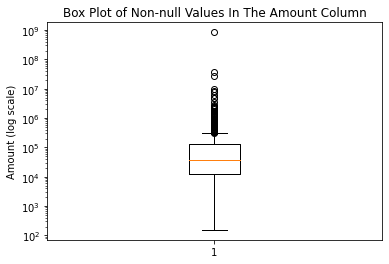

In [433]:
# but we will use the non-null values to check for outliers and the statistical values 
non_null_value_3 = df3['Amount'].dropna()

# now let's create our box plot with the log scale
plt.boxplot(non_null_value_3)
plt.ylabel('Amount (log scale)')
plt.title('Box Plot of Non-null Values In The Amount Column')
plt.yscale('log')
plt.show()

FROM THE BOX PLOT OBSERVATION WE CAN SAY:


the box plot shows that the data points are skewed towards the bottom and there are some points far away from the bottom of the box, it indicates the presence of outliers. Outliers can significantly affect the mean, making it less representative of the central tendency of the data. In this case, using the median for imputation rather than the mean wll be a more robust approach.

TO FURTHER UNDERSTAND THE DATA, LET'S USE A HISTOGRAM TO SEE THE DISTRIBUTION OF

DATA POINTS IN THE AMOUNT COLUMN

<function matplotlib.pyplot.show(close=None, block=None)>

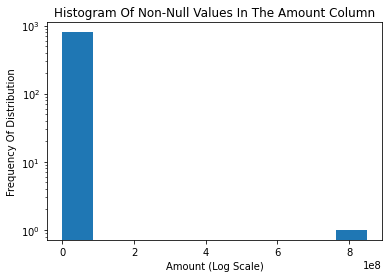

In [434]:
# Filtering out the null values 
non_null_value_3 = df3['Amount'].dropna()

# Creating a histogram of the amount column with a log scale
plt.hist(non_null_value_3, bins=10, log=True)
plt.xlabel('Amount (Log Scale)')
plt.ylabel('Frequency Of Distribution')
plt.title('Histogram Of Non-Null Values In The Amount Column')
plt.show

FROM THE ABOVE DISPLAY OF THE HISTOGRAM, WE CAN MAKE THE FOLLOWING DEDUCTIONS

The histogram shows the distribution of the 'Amount' column, indicating that the majority of values are concentrated in the lower range with high frequency, while the higher values are sparsely distributed.

This distribution pattern suggests that there may be a right-skewness or a long tail in the data. It indicates that there are relatively fewer instances with higher values compared to the instances with lower values.

the distribution pattern observed in the histogram, with a concentration of values in the lower range and a sparser distribution towards higher values, suggests that using the median for imputation could be a suitable approach.

NOTE:

The median is a measure of central tendency that is less affected by outliers or extreme values compared to the mean. In our case, since there are some data points that are far away from the majority of values, using the median as an imputation method can provide a more robust estimate of the central value of the 'Amount' column.

In [435]:

df3['Amount'] = df3['Amount'].astype(str)  # Converting 'Amount' column to string

df3['Amount'] = df3['Amount'].str.upper() # coverting every string to upper cas

In [436]:
# Replace 'NAN' strings with actual NaN values
df3['Amount'] = df3['Amount'].replace('NAN', np.nan)

In [437]:
# Filter the non-null values of the 'Amount' column:
non_null_values_3

# Calculating the median of the non-null values:
median_value_3 = non_null_values_3.median()

# Imputing the null values in the 'Amount' column with the median value:

df3['Amount'].fillna(median_value_3, inplace=True)

In [438]:
df3['Amount'].isnull().sum() # confirming the null values in the Amount column Again to be sure 

253

In [439]:
df3['Amount']

0            2425.47
1            1212.73
2                NaN
3            4850.94
4             4123.3
5            7276.41
6            7276.41
7                NaN
8          545730.68
9           12127.35
10           24254.7
11               NaN
12               NaN
13          14552.82
14           7276.41
15        8004049.95
16           1455.28
17          90955.11
18               NaN
19          12127.35
20               NaN
21          60636.74
22          12127.35
23           6063.67
24          36382.05
25         121273.48
26        1758465.52
27        1212734.84
28               NaN
29               NaN
30         254674.32
31          48509.39
32         242546.97
33          12127.35
34           6791.32
35               NaN
36           4850.94
37           3335.02
38         242546.97
39          12127.35
40               NaN
41          54573.07
42          60636.74
43         181910.23
44               NaN
45        4729665.88
46          84891.44
47           

In [440]:
df3['Amount'] = df3['Amount'].astype(float)  # Convert 'Amount' column back to float


In [441]:
df3['Amount'].isnull().sum()

253

In [442]:
df3 = df3.drop(['column10','Founded','Founders','Investor'], axis=1) #dropping specific columns from the DataFrame 

In [443]:
df3['Funding Year'] = 2020 # Assign 2020 to the 'Funding Year' column

In [444]:
new_column_names = {'Company_Brand': 'Company', 'What_it_does': 'About', 'HeadQuarter': 'Location'} # Renaming columns
df3 = df3.rename(columns=new_column_names)

In [445]:
df3 = df3.drop(['Indiancurr', 'UsCurr'], axis=1) # dropping these columns 


In [446]:
df3.head() # checking the head of the data to confirm before saving the data 

,Company,Location,Sector,About,Amount,Stage,Funding Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,2425.47,Early Stage,2020
1,Krayonnz,Bengaluru,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,1212.73,Early Stage,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,NaN,Early Stage,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,4850.94,Mid Stage,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,4123.30,Other Stages,2020


In [447]:
# saving the clean data set

df3.to_csv('df_2020.csv', index=False)

#### 2021 Data

In [448]:
df4.head() #showing the first five rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.00,Bangalore,AI startup,"Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.","Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school transformation system that assures excellent learning for every child.,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marketplace for packaging products.,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, empowering them with financial literacy and ease of secured financial transactions.",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [449]:
df4.shape #understanding the size of your DataFrame

(1209, 9)

In [450]:
df4.columns #retrieving the column names of the DataFrame

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [451]:
df4.info() #providing a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [452]:
df4.describe(include='object') #providing descriptive statistics for columns of object data type in the DataFrame

,Company_Brand,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,1209,1208,1209,1209,1205,1147,1206,781
unique,1033,70,254,1143,1095,937,278,31
top,BharatPe,Bangalore,FinTech,BharatPe develops a QR code-based payment app for offline retailers and businesses.,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,$Undisclosed,Seed
freq,8,426,122,4,7,24,73,246


In [453]:
df4.isnull().sum() # looking for missing values in dataFrame

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

#### Handling Duplicated Data

In [454]:
#checking for duplicate values in each column of the DataFrame df4
columns_to_check4 = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']

for column4 in columns_to_check4:
    has_duplicates4 = df4[column4].duplicated().any()
    print(f'{column4}: {has_duplicates4}')

Company_Brand: True
Founded: True
HeadQuarter: True
Sector: True
What_it_does: True
Founders: True
Investor: True
Amount: True
Stage: True


In [455]:
#removing any rows that have the same values in all the specified columns.
df4.drop_duplicates(subset=['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'], inplace=True)

#### Handling Categorical Data

In [456]:
df4['HeadQuarter'].unique() # here we are looking at the unique values in the column 

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [457]:
# From obersavtion, there is use of official and unofficial names of certain cities.
# The incorrect names need to be rectified for correct analysis, eg A city with more than one name.

df4['HeadQuarter'] = df4['HeadQuarter'].replace (['Bangalore','Bangalore City','Belgaum'], 'Bengaluru')
df4['HeadQuarter'].replace('Gurugram\t#REF!','Gurugram',inplace =True, regex=True)
df4['HeadQuarter'] = df4['HeadQuarter'].str.replace('New Delhi','Delhi')

In [458]:
#using a filter to get all the miss match values in the HeadQuater column

df4[df4['HeadQuarter'].isin(['Online Media\t#REF!', 'Pharmaceuticals\t#REF!','Computer Games','Information Technology & Services','Food & Beverages'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.00,Computer Games,Computer Games,A real money game app specializing in trivia games,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
241,MasterChow,2020.00,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009.00,Pharmaceuticals\t#REF!,Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
1100,Sochcast,2020.00,Online Media\t#REF!,Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience,"CA Harvinderjit Singh Bhatia, Garima Surana, Anil Srivatsa","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None
1176,Peak,2014.00,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put the power of AI at the center of all commercial decision making with Decision Intelligence,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [459]:
#assigning specific values to HeadQuarter", "Amount", "Stage in the DataFrame

df4.loc[df4["Company_Brand"] == "FanPlay", ["HeadQuarter", "Amount", "Stage"]] = ["None", "$1200000","None"]
df4.loc[df4["Company_Brand"] == "FanPlay"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.00,None,Computer Games,A real money game app specializing in trivia games,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,None


In [460]:
#assigning specific values to HeadQuarter", "Amount", "Stage in the DataFrame

df4.loc[df4["Company_Brand"] == "MasterChow", ["HeadQuarter", "Sector"]] = ["Hauz Khas", "Food & Beverages"]
df4.loc[df4["Company_Brand"] == "MasterChow"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
241,MasterChow,2020.00,Hauz Khas,Food & Beverages,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [461]:
# here we are repositioning the values into their correct columns

df4.loc[df4["Company_Brand"] == "Fullife Healthcare", ["HeadQuarter","Sector","What_it_does","Investor", "Amount", "Stage"]] = ["None","Pharmaceuticals","Primary Business is Development and Manufactur...","Varun Khanna", "$22000000","Series C"]
df4.loc[df4["Company_Brand"] == "Fullife Healthcare"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
242,Fullife Healthcare,2009.00,None,Pharmaceuticals,Primary Business is Development and Manufactur...,Morgan Stanley Private Equity Asia,Varun Khanna,$22000000,Series C


In [462]:
# getting the all the data points that matches the company_Brand name 'Peak'

df4.loc[df4["Company_Brand"] == "Peak", ["HeadQuarter", "Sector"]] = ["Manchester", "Information Technology & Services"]
df4.loc[df4["Company_Brand"] == "Peak"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1176,Peak,2014.00,Manchester,Information Technology & Services,Peak helps the world's smartest companies put the power of AI at the center of all commercial decision making with Decision Intelligence,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [463]:
# getting the all the data points that matches the company_Brand name 'Sochcast'

df4.loc[df4["Company_Brand"] == "Sochcast", ["HeadQuarter", "Sector",'What_it_does','Founders','Investor',"Amount"]] = [np.nan, 'Online Media','Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','CA Harvinderjit Singh Bhatia, Garima Surana','Vinners, Raj Nayak, Amritaanshu Agrawal',"$Undisclosed"]
df4.loc[df4["Company_Brand"] == "Sochcast"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1100,Sochcast,2020.00,NaN,Online Media,Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience,"CA Harvinderjit Singh Bhatia, Garima Surana","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None


In [464]:
df4['Sector'].unique() # here we are looking at the unique value of the Sector column 

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [465]:
# here we are updating this Row 'MoEVing'

df4.loc[df4["Company_Brand"] == "MoEVing", ["Sector",'What_it_does','Founders','Investor','Amount','Stage']] = [
'Electric Mobility',"MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.",
'Vikash Mishra, Mragank Jain','Anshuman Maheshwary, Dr Srihari Raju Kalidindi','$5000000','Seed']
df4.loc[df4["Company_Brand"] == "MoEVing"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
257,MoEVing,2021.00,Gurugram,Electric Mobility,MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed


In [466]:
df4["Stage"].unique() # getting the unique values in this column 

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt', 'None',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [467]:
df4[df4["Stage"]=='$6000000'] # getting the row that matches the Amount 
# repositioning the values to their respective columns  

df4.loc[df4["Company_Brand"] == "MYRE Capital", ["Amount", "Stage"]] = ["6000000",np.nan]
df4.loc[df4["Company_Brand"] == "MYRE Capital"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
674,MYRE Capital,2020.00,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,6000000,NaN


In [468]:
df4[df4["Stage"]=='$300000'] # getting the row that matches the Amount and 
# repositioning the values to their respective columns

df4.loc[df4["Company_Brand"] == "Little Leap", ["Amount", "Stage"]] = ["300000",np.nan]
df4.loc[df4["Company_Brand"] == "Little Leap"]

df4.loc[df4["Company_Brand"] == "BHyve", ["Amount", "Stage"]] = ["300000",np.nan]
df4.loc[df4["Company_Brand"] == "BHyve"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
551,BHyve,2020.00,Mumbai,Human Resources,A Future of Work Platform for diffusing Employee Tacit Knowledge and enabling Peer Learning Networks,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",300000,NaN


In [469]:
df4[df4["Stage"]=='$1000000'] # getting the row that matches the Amount and 
# repositioning the values to their respective columns

df4.loc[df4["Company_Brand"] == "Saarthi Pedagogy", ["Amount", "Stage"]] = ["1000000",np.nan]
df4.loc[df4["Company_Brand"] == "Saarthi Pedagogy"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
677,Saarthi Pedagogy,2015.00,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serving to school as an academic growth partner and provide 360° solutions to schools on Academic Strategies",Pedagogy,Sushil Agarwal,1000000,NaN


In [470]:
df4["Amount"].unique() # getting unique values 

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [471]:
# checking if these specific values are present in the amount column 

df4[df4['Amount'].isin([ 'Seed','JITO Angel Network, LetsVenture','ITO Angel Network, LetsVenture','Pre-series A','ah! Ventures'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
545,AdmitKard,2016.00,Noida,EdTech,A tech solution for end to end career advisory to students looking to study abroad.,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None
1148,Godamwale,2016.00,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics company providing end to end supply chain solutions.,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,None


In [472]:
# getting the row that matches the Amount 
# repositioning the values to their respective columns

df4.loc[df4["Company_Brand"] == "Godamwale", ["Amount", "Stage", "Investor"]] = ["$1000000", "Seed",np.nan]
df4.loc[df4["Company_Brand"] == "Godamwale"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1148,Godamwale,2016.00,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics company providing end to end supply chain solutions.,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",NaN,$1000000,Seed


In [473]:
# below we are reformatting rows with the company value Little Leep with its correct column values

df4.loc[df4["Company_Brand"] == "Little Leap", ["Amount", "Stage", "Investor"]] = [
    "$300000", np.nan, "ah! Ventures"]

df4.loc[df4["Investor"] == "ah! Ventures"] # here we are fetching the investor's column that matches 'ah! ventures'

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
356,OwO,2020.00,Gurugram,E-commerce,"Shop packaged drinking water, beverages from your favorite brands i.e. Kinley, Bisleri, Aquafina, Coca-cola, Pepsi etc",Hardev Sahu,ah! Ventures,"$200,000",None
538,Little Leap,2020.00,Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in age range 5-15,ah! Ventures,$300000,NaN
840,Klassroom,2016.00,Mumbai,EdTech,Klassroom offers a one-of-a-kind LIVE interactive learning experience to students.,Alka Javeri,ah! Ventures,"$200,000",Pre-series A
1133,Enercomp,2013.00,Ahmedabad,Information Technology & Services,Enercomp Solutions Pvt Ltd provide drone based economically viable solutions for different sectors to improve efficiency and accuracy.,SURESH SHAHDADPURI,ah! Ventures,$200000,None


In [474]:
df4.loc[df4["Company_Brand"] == "AdmitKard", ["Amount", "Stage", "Investor"]] = [
    "$1000000", "Pre-series A",np.nan]
df4.loc[df4["Company_Brand"] == "AdmitKard"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
545,AdmitKard,2016.00,Noida,EdTech,A tech solution for end to end career advisory to students looking to study abroad.,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,$1000000,Pre-series A


In [475]:
# Cleaning the Amounts column & # removing the currency symbol in df_2021

df4['Amount'] = df4['Amount'].astype(str).str.replace('[\₹$,]', '', regex=True)
df4['Amount'] = df4['Amount'].str.replace('Undisclosed', 'NAN', regex=True)
df4['Amount'] = df4['Amount'].str.replace('undisclosed', 'NAN', regex=True)
df4['Amount'] = df4['Amount'].str.replace('None', 'NAN', regex=True)
df4['Amount'].replace(",", "", inplace = True, regex=True)
df4['Amount'].replace("—", 0, inplace = True, regex=True)
df4['Amount'].replace("", '0', inplace=True, regex=True)

In [476]:
df4['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'NAN', '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '4400

In [477]:
df4[df4['Amount'] == 'Pre-series A']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


In [478]:
df4.loc[df4['Company_Brand'] == 'AdmitKard', 'Amount'] = 1000000 # replacing the real value for this row by help of google

In [479]:
df4['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'NAN', '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '4400

In [480]:
df4['Amount'] = df4['Amount'].astype(float)
type(df4['Amount'][0])   # we are converting to float 

numpy.float64

In [481]:
df4['Amount'].unique() # comfirming the unique values in the Amount column

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05,      nan, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07,
       7.50e+06, 2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08,
       1.70e+07, 3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08,
       5.50e+06, 8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11,
       3.00e+08, 2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

In [482]:
df4['Amount'].value_counts() # here we are checking the total value counts of all the unique values 

1000000.00         86
2000000.00         60
3000000.00         48
10000000.00        43
5000000.00         42
200000.00          36
500000.00          35
4000000.00         30
300000.00          29
6000000.00         24
400000.00          24
30000000.00        21
20000000.00        20
1500000.00         19
15000000.00        17
7000000.00         16
100000000.00       15
50000000.00        15
600000.00          14
1200000.00         14
100000.00          14
700000.00          14
40000000.00        14
12000000.00        11
8000000.00         10
2500000.00         10
800000.00          10
3500000.00          9
75000000.00         8
1800000.00          8
150000.00           8
11000000.00         7
1300000.00          7
25000000.00         7
5500000.00          7
200000000.00        7
9000000.00          6
1600000.00          6
1100000.00          6
4500000.00          6
150000000.00        5
1700000.00          5
70000000.00         5
2200000.00          5
13000000.00         5
35000000.0

In [483]:
null_values_Amount4 = df4['Amount'].isnull().sum() # here we are comfirming for null values
print(null_values_Amount4) 

139


In [484]:
len(df4['Amount'])

1190

NOW LET'S FIND THE PERCENTAGE OF NULL VALUES TO THE THAT OF THE WHOLE 
AMOUNT COLUMN 
this will help us to understand and appreciate the impact of the null values in the Amount column

In [485]:
# Finding the percentage of null values

Amnt_null_perc = (null_values_Amount4 / len(df4['Amount'])) * 100
Amnt_null_perc

11.680672268907562

In [486]:
amount_stats = df4['Amount'].describe()
print(amount_stats)

count           1051.00
mean       170892983.82
std       4626738028.71
min                0.00
25%          1000000.00
50%          3500000.00
75%         15000000.00
max     150000000000.00
Name: Amount, dtype: float64


In [487]:
pd.options.display.float_format = '{:,.2f}'.format
print(amount_stats)

count             1,051.00
mean        170,892,983.82
std       4,626,738,028.71
min                   0.00
25%           1,000,000.00
50%           3,500,000.00
75%          15,000,000.00
max     150,000,000,000.00
Name: Amount, dtype: float64


from the above output, we can see that, the percentage of null values in the Amount column 
is very high, now to impute for the missing values, we will conduct some test to select the best out of these two 
either mean or medain since, the date set is too small to use other methods such, multiple imputation, regression imputation etc,

SO BELOW WE WILL USE BOTH: 1. DISTRIBUTION SHAPE
2. CHECKING FOR OUTLIERS


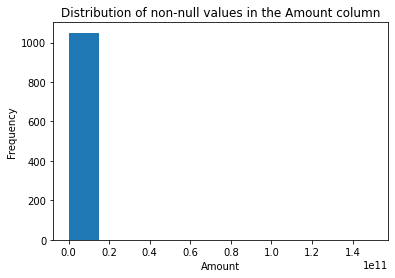

In [488]:
# first we will use the distribution shape by the help of a histogram 
# below we are plotting the histogram 

plt.hist(df4['Amount'].dropna(), bins=10) 
plt.xlabel('Amount')
#plt.xticks(df4['Amount'].dropna().unique())
plt.ylabel('Frequency')
plt.title('Distribution of non-null values in the Amount column')
plt.show()


histogram we plot above suggests that the majority of the non-null values in the 'Amount' column are concentrated within the first bin (0.0 to 0.2 on the x-axis) with a frequency of 1000 on the y-axis. This means that a large number of values in the 'Amount' column are close to zero or have very small values.

The remaining bins from 0.2 to 1.4 on the x-axis have no or very few values, indicating that the range of values beyond the first bin is sparsely populated.

Overall, the histogram above suggests that the distribution of values in the 'Amount' column is highly skewed, with a heavy concentration of values around zero or small values, and a lack of values in the higher range. This skewness and concentration of values at zero or small values may impact the appropriateness of using the mean for imputation, as it may be heavily influenced by these extreme values.

BELOW IS THE NEXT STEP TO CONFIRM WHERTHER TO USE THE MEDAIN OF NOT 

To confirm whether using the median is a suitable imputation method, we can perform a hypothesis test to compare the distribution of non-null values in the 'Amount' column with the distribution of the imputed values using the median.

In [489]:
# below we are creating the two sets non-null and the median imputed 

non_null_values_4 = df4['Amount'].dropna()
median_imputed_values_4 = df4['Amount'].fillna(df4['Amount'].median())

below we are 
Performing a statistical test to compare the distributions of the two groups. 
One option is to use the Kolmogorov-Smirnov test, which can be performed using 
the ks_2samp() function from the scipy.stats module.

In [490]:
# below we are conducting the test 
test_statistic4, p_value4 = ks_2samp(non_null_values_4, median_imputed_values_4)
test_statistic4
p_value4

0.043077707820372166

NOW: we will set a significant value to 0.05 
now we will also set both a null hypothesis and an alternate hyppthesis, which will either be rejected
of accpeted based on the significant value 

Null Hypothesis (H0): The distributions of non-null values and imputed values using the median are the same

Alternative Hypothesis (H1): The distributions of non-null values and imputed values using the median are different.

The significance level allows us to set a standard of evidence required to reject the null hypothesis. If the p-value, which represents the probability of observing the data given that the null hypothesis is true, is less than or equal to the significance level, we reject the null hypothesis. This implies that the observed result is unlikely to have occurred by chance alone and supports the alternative hypothesis

In [491]:
significance_level = 0.05

if p_value4 < significance_level:
    print("There is a significant difference between the distributions.")
else:
    print("There is no significant difference between the distributions.")


There is a significant difference between the distributions.


TEST_OUT_COME AND IMPLICATIONS 
The test results indicate that there is no significant difference between the distributions of the non-null values and the imputed values using the median. Since the p-value (0.0431) is greater than the significance level (0.05), we fail to reject the null hypothesis. This suggests that the imputed values using the median are similar to the observed non-null values in terms of their distribution

based on the test results, it appears that using the median to impute the missing values in the 'Amount' column would be a reasonable approach. The distribution of the imputed values using the median is not significantly different from the distribution of the non-null values. Therefore, imputing the missing values with the median value can provide a reliable estimate while preserving the overall distribution characteristics of the data

NOW WE CAN CONFIDENTLY FILLIN THE NULL VALUES WITH THE MEDIAN 
AS SHOWN BELOW 

In [492]:
median_value_4 = df4['Amount'].median()
df4['Amount'] = df4['Amount'].fillna(median_value_4) # here we fill in the nan values using the median strategy 

In [493]:
# now let's confirm the Amount column column for null values again 
df4['Amount'].isna().sum()

0

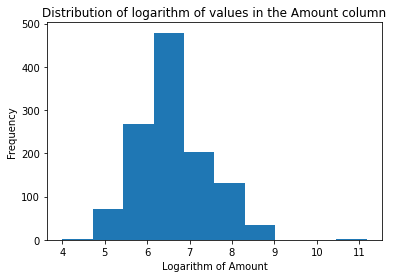

In [494]:
# first we will use the distribution shape by the help of a histogram 
# below we are plotting the histogram 

# Apply logarithmic transformation to the data
# Filter out non-positive and missing values
valid_amounts = df4['Amount'][df4['Amount'] > 0].dropna()

# Apply logarithmic transformation to the filtered values
log_amount = np.log10(valid_amounts)

# Plot the histogram using logarithmic scale
plt.hist(log_amount, bins=10)
plt.xlabel('Logarithm of Amount')
plt.ylabel('Frequency')
plt.title('Distribution of logarithm of values in the Amount column')
plt.show()


NOW LET'S DEAL WITH NULL VALUES IN THE STAGE COLUMN 

In [495]:
null_stage_4 = df4['Stage'].isnull().sum()  # checking for null values in the stage column 
null_stage_4

421

In [496]:
null_stage_4 = df4['Stage'].isnull().sum()
perce_null_stage4 = (null_stage_4 / len(df4['Stage'])) * 100 # here we want to know the percentage of the null values in the stage column 
perce_null_stage4

35.378151260504204

BEFORE CONTINUING LET'S FURTHER GROUP THE STAGE COLUMN TO MAKE THINGS SIMPLER 

In [497]:
grouped_stages_4 = {
    # Group 1: Early Stage
    'Pre-seed': 'Early Stage',
    'Seed': 'Early Stage',
    'Seed A': 'Early Stage',
    'Seed Funding': 'Early Stage',
    'Seed Investment': 'Early Stage',
    'Seed Round': 'Early Stage',
    'Seed Round & Series A': 'Early Stage',
    'Seed fund': 'Early Stage',
    'Seed funding': 'Early Stage',
    'Seed round': 'Early Stage',
    'Seed+': 'Early Stage',

    # Group 2: Mid Stage
    'Series A': 'Mid Stage',
    'Series A+': 'Mid Stage',
    'Series A-1': 'Mid Stage',
    'Series A2': 'Mid Stage',
    'Series B': 'Mid Stage',
    'Series B+': 'Mid Stage',
    'Series B2': 'Mid Stage',
    'Series B3': 'Mid Stage',
    'Series C': 'Mid Stage',
    'Seies A': 'Mid Stage',
    
    # Group 3: Late Stage
    'Series D': 'Late Stage',
    'Series I': 'Late Stage',
    'Series D1': 'Late Stage',
    'Series E': 'Late Stage',
    'Series E2': 'Late Stage',
    'Series F': 'Late Stage',
    'Series F1': 'Late Stage',
    'Series F2': 'Late Stage',
    'Series G': 'Late Stage',
    'Series H': 'Late Stage',
    
    # Group 4: Other Stages
    'Angel': 'Other Stages',
    'Angel Round': 'Other Stages',
    'Bridge': 'Other Stages',
    'Bridge Round': 'Other Stages',
    'Corporate Round': 'Other Stages',
    'Debt': 'Other Stages',
    'Debt Financing': 'Other Stages',
    'Early seed': 'Other Stages',
    'Edge': 'Other Stages',
    'Fresh funding': 'Other Stages',
    'Funding Round': 'Other Stages',
    'Grant': 'Other Stages',
    'Mid series': 'Other Stages',
    'Non-equity Assistance': 'Other Stages',
    'None': 'Other Stages',
    'PE': 'Other Stages',
    'Post series A': 'Other Stages',
    'Post-IPO Debt': 'Other Stages',
    'Post-IPO Equity': 'Other Stages',
    'Pre Series A': 'Other Stages',
    'Pre- series A': 'Other Stages',
    'Pre-Seed': 'Other Stages',
    'Pre-Series B': 'Other Stages',
    'Private Equity': 'Other Stages',
    'Secondary Market': 'Other Stages',
    'Pre-series A': 'Other Stages',
    'None': 'Other Series',
    'Pre-series B':'Other Stages',
    'Pre-series A1': 'Other Stage',
    'Pre-series':'Other Stages',
}

df4['Stage'] = df4['Stage'].replace(grouped_stages_4)


In [498]:
df4['Stage'] # here we are want to look at the stage column again 

0       Other Stages
1               None
2         Late Stage
3          Mid Stage
4        Early Stage
5               None
6               None
7       Other Stages
8               None
9               None
10      Other Stages
11              None
12       Early Stage
13              None
14              None
15              None
16              None
17      Other Stages
18       Early Stage
19         Mid Stage
20        Late Stage
21       Early Stage
22       Early Stage
23      Other Stages
24              None
25       Early Stage
26         Mid Stage
27        Late Stage
28      Other Stages
29       Early Stage
30       Early Stage
31              None
32       Early Stage
33      Other Stages
34              None
35              None
36              None
37              None
38              None
39       Early Stage
40              None
41       Early Stage
42              None
43       Early Stage
44       Early Stage
45       Early Stage
46              None
47         Mi

In [499]:
# checking for these values in the stage column which are not supposed to be there

not_wanted_stage_4 = ["FinTech", "EdTech", "Financial Services", "Food & Beverages", "Information Technology & Services",  "E-commerce"]
not_wanted_rows = df4['Stage'].isin(not_wanted_stage_4)
not_wanted_rows.sum()

0

BELOW WE WANT TO DISPLAY STAGES THAT ARE GROUP INTO THE GROUPS FROM ABOVE 

In [500]:
# Count the occurrences of each unique value in the "Stage" column
stage_counts = df4['Stage'].value_counts()

# Filter for values that are not in the grouped stages
ungrouped_stages = stage_counts[~stage_counts.index.isin(grouped_stages_4.values())]

# Display the ungrouped stage values
print(ungrouped_stages)


Series([], Name: Stage, dtype: int64)


LET'S DROP VALUES(ROW) FROM THE SECTOR COLUMN THAT DO NOT HAVE ANY CORRESPONDING STAGE IN THE STAGE COLUMN 

BELOW IS ONE WAY TO HELP SELECT THE BEAT METHOD TO DEAL WITH THE MISSING VALUES IN THE STAGE COLUMN 

 creating a cross-tabulation or contingency table between the "Stage" column and the "Sector" column
 This will generate a table showing the counts of each combination of stages and Sectors. It will help us identify if certain stages are more prevalent in specific Sectors


BUT FIRST LET'S CONFIRM THE NULL VALUES OF THE SECTOR COLUMN 

In [501]:
df4['Sector'].isnull().sum() # checking for null values in the Sector column 

0

NOW LET'S CREATE THE CROSSTAB

In [502]:
cross_table_sec_stage_4 = pd.crosstab(df4['Sector'], ['Stage']) # here we are creating a contingency table between stage and sector 
cross_table_sec_stage_4

col_0,Stage
Sector,
AI Chatbot,1
AI company,2
AI startup,10
AR startup,1
Advertisement,1
Advisory firm,1
Aeorspace,1
AgriTech,20
Analytics,1


now to deal with the missing value in the stage column, we will use the percentage of the first 6 largest most occurring 
stage to fill in the missing values


In [503]:
# below we are getting the percentages 
cross_table_sec_stage_perc_4 = (cross_table_sec_stage_4['Stage'] / cross_table_sec_stage_4['Stage'].sum()) * 100
cross_table_sec_stage_perc_4

Sector
AI Chatbot                              0.08
AI company                              0.17
AI startup                              0.84
AR startup                              0.08
Advertisement                           0.08
Advisory firm                           0.08
Aeorspace                               0.08
AgriTech                                1.68
Analytics                               0.08
Apparel & Fashion                       0.59
Arts & Crafts                           0.17
Augmented reality                       0.08
Automation                              0.17
Automobile                              0.08
Automotive                              2.69
Aviation                                0.08
Aviation & Aerospace                    0.08
B2B                                     0.17
B2B E-commerce                          0.17
B2B Ecommerce                           0.17
B2B Manufacturing                       0.08
B2B Marketplace                         0.08
B2B

NOW LET'S LOOK AT THE FIRST SIX 

In [504]:
top_six_stages = cross_table_sec_stage_perc_4.nlargest(6) # here we are looking at the top six stages 
top_six_stages

Sector
FinTech                             10.17
EdTech                               8.57
Financial Services                   4.96
E-commerce                           3.11
Food & Beverages                     3.11
Information Technology & Services    2.94
Name: Stage, dtype: float64

NOW LET'S FILL IN THE MISSING VALUES IN THE STAGE COLUMN, USING THE RESPECTIVE VALUES IN FROM THE TOP SIX 
STAGES 


In [505]:
# Filling missing values in "Stage" column with the top six values

# Normalize the probabilities
normalize_prob_4 = top_six_stages / top_six_stages.sum()
# Filling missing values in "Stage" column with the top six values
df4['Stage'] = df4['Stage'].fillna(pd.Series(np.random.choice(top_six_stages.index.tolist(), size=len(df4['Stage']), p=normalize_prob_4.values)))

NOW LET'S CONFRIM THE MISSING VALUES IN THE AMOUNT STAGES AGAIN 

In [506]:
# confirming the null values in the amount column again 
df4['Stage'].isnull().sum()

3

In [507]:
df4['Stage'] = df4['Stage'].astype(str)

In [508]:
still_null = df4['Stage'].isnull() # here we want to show all the rows with the null or nan values 
rows_still_null = df4[still_null]
rows_still_null

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


In [509]:
df.loc[df['Company'] == 'Geniemode', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Sapio Analytics', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Voxelgrids', 'Stage'] = 'Seed'


In [510]:
# Dropping the columns that are not important to our analysis

df4.drop(columns=['Founders','Investor','Founded'], inplace=True)

In [511]:
df4.insert(6,"Funding Year", 2021) # inserting a new column 'funding Year 2021' to keep track of the data sets when combining

In [512]:
df4.rename(columns = {'Company_Brand':'Company',
                        'HeadQuarter':'Location',
                        'What_it_does':'About'},
             inplace = True)

In [513]:
df4.head() # looking at head to comfirm before saving the data 

,Company,Location,Sector,About,Amount,Stage,Funding Year
0,Unbox Robotics,Bengaluru,AI startup,"Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.","1,200,000.00",Other Stages,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"120,000,000.00",EdTech,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school transformation system that assures excellent learning for every child.,"30,000,000.00",Late Stage,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marketplace for packaging products.,"51,000,000.00",Mid Stage,2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, empowering them with financial literacy and ease of secured financial transactions.","2,000,000.00",Early Stage,2021


In [514]:
df4['Stage'] = df4['Stage'].astype(str)

In [515]:
# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)  # Disable column width restriction
pd.set_option('display.max_colwidth', None)  # Disable truncation of column contents
pd.set_option('display.float_format','{:.2f}'.format)

In [516]:
df4.loc[df4['Company'] == 'upGrad', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Urban Company', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Comofi Medtech', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Smart Joules', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Miko', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'M1xchange', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Do Your Thng', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'LegitQuest', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Fantasy Akhada', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Speciale Invest', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Meesho', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Elevar', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Curefoods', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Camp K12', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Defy', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Homversity', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Loop Health', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Smartstaff', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Hyperface', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Melorra', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Onato', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Mestastop Solutions', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'MergerDomo', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Trell', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Homeville', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Ola Electric', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Delhivery', 'Stage'] = 'Series F'
df4.loc[df4['Company'] == 'Upgame', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Sochcast', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'byteXL', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'EventBeep', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'GameEon Studios', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Tessolve', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'EF Polymer', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'LearnVern', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Beldara', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Oye Rickshaw', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'OfBusiness', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'CareerLabs', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Studio Sirah', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == '1Bridge', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'TartanSense', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Bewakoof', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Elda Health', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Ruptok', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == "O' Be Cocktails", 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Hike', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'House of Kieraya', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'DrinkPrime', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SATYA MicroCapital', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'CreatorStack', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Rage Coffee', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Klub', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Stellaris Venture Partners', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Celcius', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'UrbanMatrix Technologies', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Evenflow Brands', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Atomberg', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'ShopMyLooks', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Veefin', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'BangDB', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'O’ Be Cocktails', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'OneCard', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Hubhopper', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Avataar Ventures', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Codingal', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Junio', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'MPL', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Bombay Shaving Company', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'MFine', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Darwinbox', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'SSA Finserv', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pariksha', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Devic Earth', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pocket Aces', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Biocon Biologics', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Biconomy', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Bandhoo', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Mamaearth', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Inspacco', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'GODI Energy', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Lenskart', 'Stage'] = 'Series E'
df4.loc[df4['Company'] == 'Clensta', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Polygon', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Thingsup', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'TRDR', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SuperBottoms', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Wingreens Farms', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Bombay Hemp Company', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Zenpay Solutions', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Visit Health', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Zetwerk', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Wiingy', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Arcana', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Duroflex', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Tvasta', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Vakilsearch', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'PumPumPum', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Sterling Accuris Wellness', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Braingroom', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Vegrow', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Automovill', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Bella Vita Organic', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'SmartCoin', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'MYSUN', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Square Yards', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Slang Labs', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SMOOR', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'UrbanKisaan', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'BHyve', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SpEd@home', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Now&Me', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Capital Float', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'PazCare', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'MicroDegree', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Plutomen', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Grinntech', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Navars', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Slice', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'CredR', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Dream Sports', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Annapurna Finance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Purplle', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Nazara Technologies', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Svasti Microfinance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'BlackSoil NBFC', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Kinara Capital', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'AMPM', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Design Cafe', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'eShipz', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Atomberg Technologies', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Peppermint', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'CredR', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Dream Sports', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Annapurna Finance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Purplle', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Nazara Technologies', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Svasti Microfinance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'BlackSoil NBFC', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Kinara Capital', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'AMPM', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Design Cafe', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'eShipz', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Atomberg Technologies', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Peppermint', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Spintly', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'ShopSe', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'ShareChat', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Safexpay', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Advantage Club', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SuperGaming', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SleepyCat', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Ultrahuman', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Yojak', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Navia Life Care', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Locale.ai', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Whiz League', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'CHARGE+ZONE', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'PingoLearn', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Practically', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Keka HR', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Marquee Equity', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'GoTo', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Furlenco', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Chalo', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Udaan', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'MyGlamm', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Inshorts', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Bikry app', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'The Ayurveda Co', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Furlenco', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Rockclimber', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Power Gummies', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Answer Genomics', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Saarthi Pedagogy', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Lavado', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'NIRAMAI', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Meddo', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Five Star Finance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Policybazaar', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'OYO', 'Stage'] = 'Series F'
df4.loc[df4['Company'] == 'Blume Ventures', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'ImaginXP', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Virohan', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Apna.co', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Get My Parking', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'FanCode', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Enthu.ai', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company'] == 'Zepto', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'TurboHire', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SatSure', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Leap India', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Better Capital', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Rentomojo', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Kissan Pro', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'VLCC Health Care', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'SUN Mobility', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'The Indus Valley', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'BharatPe', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'BankSathi', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company'] == 'Auntie Fung', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Sanctum Wealth', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Easiloan', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Boutique Spirit Brands', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Chingari', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Skeps', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Kirana247', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Imagimake', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'goEgoNetwork', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Snack Amor', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Expertrons', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == '1K Kirana Bazaar', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Zupee', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'VerSe Innovation', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'MetroRide', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'PropReturns', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Deciwood', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Skippi Ice Pops', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company'] == 'Onelife', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'TenderCuts', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Scentials', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Remedico', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'PrepBytes', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'RevFin', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Paperfly', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Bolkar', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Oneiric Gaming', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'iMumz', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company'] == 'BlackSoil', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Chai Waale', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'JetSynthesys', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Skymet', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'GalaxyCard', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pankhuri', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Vah Vah!', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pratilipi', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Arcatron Mobility', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'KreditBee', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Holisol', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'India Quotient', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Nobel Hygiene', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Instoried', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Homingos', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'NODWIN', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Bijnis', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Clairco', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'BYJU\'S', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Petpooja', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Arbo Works', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Recordent', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Kaar Technologies', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Phool.co', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Log 9 Materials', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'EV Plugs', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'CredRight', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Leverage Edu', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Enercomp', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'LivQuik Technology', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Tinkerly', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pine Labs', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Lido Learning', 'Stage'] = 'Series D'


In [517]:
df4[df4['Stage'] == 'EdTech' ]

,Company,Location,Sector,About,Amount,Stage,Funding Year
11,FreeStand,Delhi,B2B service,FreeStand enables FMCG brands to execute trackable and scalable product sampling campaigns.,100000.00,EdTech,2021
52,Legitquest,Delhi,LegalTech,LegitQuest is a legal-tech company that operates a legal research platform with Indian case laws.,600000.00,EdTech,2021
86,Onsurity,Bengaluru,HealthCare,Onsurity is an employee healthcare platform providing a monthly healthcare membership with group health insurance to emerging businesses.,3500000.00,EdTech,2021
87,Karbon Card,Bengaluru,FinTech,Prime objective is to empower Indian startups by creating the right financial products starting with a high-limit corporate credit card with unlimited benefits,3500000.00,EdTech,2021
88,Factors.AI,Bengaluru,SaaS startup,"Factors.AI is a Marketing Analytics platform providing sophisticated omnichannel, every-touch attribution technology and unparalleled performance insights for Marketers",2000000.00,EdTech,2021
91,OTO Capital,Mumbai,FinTech,The Future Of Vehicle Ownership!,6000000.00,EdTech,2021
170,Hash,Delhi,Tobacco,Hash is a new startup in consumer goods.,3500000.00,EdTech,2021
171,Unacademy,Bengaluru,EdTech,Unacademy aims to build the world's largest online knowledge repository for multi-lingual education.,3500000.00,EdTech,2021
209,StackBOX,Bengaluru,Logistics & Supply Chain,DISTRIBUTION SIMPLIFIED,1200000.00,EdTech,2021
213,BOX8,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,40000000.00,EdTech,2021


In [518]:
df4.to_csv('df_2021.csv', index=False)

In [519]:
# Concatenate the data frames
clean_done = pd.concat([df, df2, df3, df4])

In [520]:
# Reseting the index of the concatenated data frame
clean_combined = clean_done.reset_index(drop=True)

In [521]:
clean_combined.to_csv('Clean_Data_18_19_20_21', index=False) # saving the data ranming it to lean_Data_18_19_20_21